#Проект: Линейные модели в машинном обучении

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

У нас есть 3 df: ferma_main.csv, ferma_dad.csv, cow_buy.csv
В данной работе нам предстоим обработать данные, исследовать их и на основе этих данных сделать модель, которая выберит нужных кором по некоторым критериям.

## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm

RANDOM_STATE = 42

Загрузим данные в датафреймы pandas. Файлы можно скачать по ссылкам в описании, они даже доступны через пути:
ferma_main.csv,
ferma_dad.csv,
cow_buy.csv

In [2]:
from google.colab import files

# Загружаем сразу несколько файлов (можно выделить их при выборе)
uploaded = files.upload()

Saving cow_buy.csv to cow_buy.csv
Saving ferma_dad.csv to ferma_dad.csv
Saving ferma_main.csv to ferma_main.csv


In [3]:
df_ferma_main = pd.read_csv('ferma_main.csv', sep = ';')
df_ferma_dad = pd.read_csv('ferma_dad.csv', sep = ';')
df_cow_buy = pd.read_csv('cow_buy.csv', sep = ';')

In [4]:
print(df_ferma_main.info())
display(df_ferma_main.head())

print(df_ferma_dad.info())
display(df_ferma_dad.head())

print(df_cow_buy.info())
display(df_cow_buy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None


Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет

Изучите данные. Определите, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости переименуйте столбцы.

Изучили данные, названия столбцов не соответсвуют стандарту оформления. В некоторых столбцах не коректный тип данных. Пропусков нету.

##  Предобработка данных

Проверьте данные на наличие пропусков и дубликатов. Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

Сделаем правильное оформление названий колонок

In [5]:
print(df_ferma_main.columns)
print(df_ferma_dad.columns)
print(df_cow_buy.columns)

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')
Index(['id', 'Имя Папы'], dtype='object')
Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')


In [6]:
new_column_names_main = {
    'id': 'id',
    'Удой, кг': 'milk_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'feed_energy_unit',
    'Сырой протеин, г': 'raw_protein_g',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ration',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'dad_breed',
    'Жирность,%': 'fat_percentage',
    'Белок,%': 'protein_percentage',
    'Вкус молока': 'milk_taste',
    'Возраст': 'age'
}

new_column_names_dad = {
    'id': 'id',
    'Имя Папы': 'dad_name'
}

new_column_names_cow = {
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'dad_breed',
    'Имя_папы': 'dad_name',
    'Текущая_жирность,%': 'current_fat_percentage',
    'Текущий_уровень_белок,%': 'current_protein_percentage',
    'Возраст': 'age'
}

In [7]:
df_ferma_main = df_ferma_main.rename(columns=new_column_names_main)
df_ferma_dad = df_ferma_dad.rename(columns=new_column_names_dad)
df_cow_buy = df_cow_buy.rename(columns=new_column_names_cow)

In [8]:
print(df_ferma_main.columns)
print(df_ferma_dad.columns)
print(df_cow_buy.columns)

Index(['id', 'milk_kg', 'feed_energy_unit', 'raw_protein_g',
       'sugar_protein_ration', 'breed', 'pasture_type', 'dad_breed',
       'fat_percentage', 'protein_percentage', 'milk_taste', 'age'],
      dtype='object')
Index(['id', 'dad_name'], dtype='object')
Index(['breed', 'pasture_type', 'dad_breed', 'dad_name',
       'current_fat_percentage', 'current_protein_percentage', 'age'],
      dtype='object')


In [9]:
display(df_ferma_main.head())
print(df_ferma_main.info())
display(df_ferma_dad.head())
print(df_ferma_dad.info())
display(df_cow_buy.head())
print(df_cow_buy.info())

id  milk_kg feed_energy_unit  raw_protein_g sugar_protein_ration  \
0   1     5863             14,2           1743                 0,89   
1   2     5529             12,8           2138                 0,89   
2   3     5810               14           1854                0,885   
3   4     5895             12,4           2012                0,885   
4   5     5302             12,8           1675                0,885   

             breed pasture_type dad_breed fat_percentage protein_percentage  \
0   Вис Бик Айдиал    Равнинное    Айдиал           3,58              3,076   
1   Вис Бик Айдиал    Равнинные   Соверин           3,54              3,079   
2  РефлешнСоверинг    Холмистое   Соверин           3,59              3,074   
3  РефлешнСоверинг    Холмистое    Айдиал            3,4              3,075   
4   Вис Бик Айдиал    Равнинные   Соверин           3,73              3,073   

  milk_taste          age  
0     вкусно  более_2_лет  
1     вкусно  менее_2_лет  
2  не вкусно  более_2_лет  
3  не вкусно  более_2_лет  
4     вкусно  менее_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    634 non-null    int64 
 1   milk_kg               634 non-null    int64 
 2   feed_energy_unit      634 non-null    object
 3   raw_protein_g         634 non-null    int64 
 4   sugar_protein_ration  634 non-null    object
 5   breed                 634 non-null    object
 6   pasture_type          634 non-null    object
 7   dad_breed             634 non-null    object
 8   fat_percentage        634 non-null    object
 9   protein_percentage    634 non-null    object
 10  milk_taste            634 non-null    object
 11  age                   634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB
None


id  dad_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


breed pasture_type dad_breed  dad_name current_fat_percentage  \
0   Вис Бик Айдиал    холмистое    Айдиал  Геркулес                   3,58   
1   Вис Бик Айдиал    равнинное   Соверин    Буйный                   3,54   
2  РефлешнСоверинг    равнинное   Соверин     Барин                   3,59   
3  РефлешнСоверинг    холмистое    Айдиал    Буйный                    3,4   
4  РефлешнСоверинг    равнинное    Айдиал    Буйный                   3,64   

  current_protein_percentage          age  
0                      3,076  более_2_лет  
1                      3,081  менее_2_лет  
2                      3,074  более_2_лет  
3                      3,061  более_2_лет  
4                      3,074  более_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   breed                       20 non-null     object
 1   pasture_type                20 non-null     object
 2   dad_breed                   20 non-null     object
 3   dad_name                    20 non-null     object
 4   current_fat_percentage      20 non-null     object
 5   current_protein_percentage  20 non-null     object
 6   age                         20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None


In [10]:
df_ferma_main['feed_energy_unit'] = df_ferma_main['feed_energy_unit'].str.replace(',','.').astype('float64')
df_ferma_main['sugar_protein_ration'] = df_ferma_main['sugar_protein_ration'].str.replace(',','.').astype('float64')
df_ferma_main['fat_percentage'] = df_ferma_main['fat_percentage'].str.replace(',','.').astype('float64')
df_ferma_main['protein_percentage'] = df_ferma_main['protein_percentage'].str.replace(',','.').astype('float64')
df_ferma_main['milk_taste'] = df_ferma_main['milk_taste'].replace({'вкусно':1, 'не вкусно':0})
df_ferma_main['age'] = df_ferma_main['age'].replace({'более_2_лет':1, 'менее_2_лет':0})

df_cow_buy['current_fat_percentage'] = df_cow_buy['current_fat_percentage'].str.replace(',','.').astype('float64')
df_cow_buy['current_protein_percentage'] = df_cow_buy['current_protein_percentage'].str.replace(',','.').astype('float64')
df_cow_buy['age'] = df_cow_buy['age'].replace({'более_2_лет':1, 'менее_2_лет':0})

<ipython-input-10-e157502ce9ce>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ferma_main['milk_taste'] = df_ferma_main['milk_taste'].replace({'вкусно':1, 'не вкусно':0})
<ipython-input-10-e157502ce9ce>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ferma_main['age'] = df_ferma_main['age'].replace({'более_2_лет':1, 'менее_2_лет':0})
<ipython-input-10-e157502ce9ce>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result

Проверим

In [11]:
display(df_ferma_main.head())
print(df_ferma_main.info())
display(df_cow_buy.head())
print(df_cow_buy.info())

print(df_ferma_main['milk_taste'].unique())
print(df_ferma_main['age'].unique())
print(df_cow_buy['age'].unique())

id  milk_kg  feed_energy_unit  raw_protein_g  sugar_protein_ration  \
0   1     5863              14.2           1743                 0.890   
1   2     5529              12.8           2138                 0.890   
2   3     5810              14.0           1854                 0.885   
3   4     5895              12.4           2012                 0.885   
4   5     5302              12.8           1675                 0.885   

             breed pasture_type dad_breed  fat_percentage  protein_percentage  \
0   Вис Бик Айдиал    Равнинное    Айдиал            3.58               3.076   
1   Вис Бик Айдиал    Равнинные   Соверин            3.54               3.079   
2  РефлешнСоверинг    Холмистое   Соверин            3.59               3.074   
3  РефлешнСоверинг    Холмистое    Айдиал            3.40               3.075   
4   Вис Бик Айдиал    Равнинные   Соверин            3.73               3.073   

   milk_taste  age  
0           1    1  
1           1    0  
2           0    1  
3           0    1  
4           1    0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    634 non-null    int64  
 1   milk_kg               634 non-null    int64  
 2   feed_energy_unit      634 non-null    float64
 3   raw_protein_g         634 non-null    int64  
 4   sugar_protein_ration  634 non-null    float64
 5   breed                 634 non-null    object 
 6   pasture_type          634 non-null    object 
 7   dad_breed             634 non-null    object 
 8   fat_percentage        634 non-null    float64
 9   protein_percentage    634 non-null    float64
 10  milk_taste            634 non-null    int64  
 11  age                   634 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 59.6+ KB
None


breed pasture_type dad_breed  dad_name  current_fat_percentage  \
0   Вис Бик Айдиал    холмистое    Айдиал  Геркулес                    3.58   
1   Вис Бик Айдиал    равнинное   Соверин    Буйный                    3.54   
2  РефлешнСоверинг    равнинное   Соверин     Барин                    3.59   
3  РефлешнСоверинг    холмистое    Айдиал    Буйный                    3.40   
4  РефлешнСоверинг    равнинное    Айдиал    Буйный                    3.64   

   current_protein_percentage  age  
0                       3.076    1  
1                       3.081    0  
2                       3.074    1  
3                       3.061    1  
4                       3.074    1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   breed                       20 non-null     object 
 1   pasture_type                20 non-null     object 
 2   dad_breed                   20 non-null     object 
 3   dad_name                    20 non-null     object 
 4   current_fat_percentage      20 non-null     float64
 5   current_protein_percentage  20 non-null     float64
 6   age                         20 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ KB
None
[1 0]
[1 0]
[1 0]


Проверка явных дубликатов

In [12]:
print(df_ferma_main.duplicated().sum())
print(df_ferma_dad.duplicated().sum())
print(df_cow_buy.duplicated().sum())

5
0
4


In [13]:
df_ferma_main = df_ferma_main.drop_duplicates().reset_index(drop=True)
df_cow_buy = df_cow_buy.drop_duplicates().reset_index(drop=True)

Проверка не явных дубликатов

In [14]:
#print(df_ferma_main)
#print(df_ferma_dad)
print(df_cow_buy)

              breed pasture_type dad_breed  dad_name  current_fat_percentage  \
0    Вис Бик Айдиал    холмистое    Айдиал  Геркулес                    3.58   
1    Вис Бик Айдиал    равнинное   Соверин    Буйный                    3.54   
2   РефлешнСоверинг    равнинное   Соверин     Барин                    3.59   
3   РефлешнСоверинг    холмистое    Айдиал    Буйный                    3.40   
4   РефлешнСоверинг    равнинное    Айдиал    Буйный                    3.64   
5   РефлешнСоверинг    равнинное   Соверин  Геркулес                    3.63   
6    Вис Бик Айдиал    равнинное   Соверин    Буйный                    3.57   
7   РефлешнСоверинг    холмистое    Айдиал    Буйный                    3.40   
8    Вис Бик Айдиал    холмистое   Соверин  Соловчик                    3.73   
9   РефлешнСоверинг    равнинное   Соверин  Геркулес                    3.73   
10   Вис Бик Айдиал    холмистое    Айдиал  Геркулес                    3.68   
11   Вис Бик Айдиал    холмистое   Совер

In [15]:
print('df_ferma_main')
print(df_ferma_main['breed'].unique())
print(df_ferma_main['pasture_type'].unique())
print(df_ferma_main['dad_breed'].unique())

print('df_ferma_dad')
print(df_ferma_dad['dad_name'].unique())

print('df_cow_buy')
print(df_cow_buy['breed'].unique())
print(df_cow_buy['pasture_type'].unique())
print(df_cow_buy['dad_breed'].unique())
print(df_cow_buy['dad_name'].unique())

df_ferma_main
['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
df_ferma_dad
['Буйный' 'Соловчик' 'Барин' 'Геркулес']
df_cow_buy
['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']


In [16]:
df_ferma_main.loc[df_ferma_main['pasture_type']=='Равнинные', 'pasture_type'] = 'Равнинное'
df_ferma_main.loc[df_ferma_main['dad_breed']=='Айдиалл', 'dad_breed'] = 'Айдиал'
df_cow_buy.loc[df_cow_buy['pasture_type']=='холмистое', 'pasture_type'] = 'Холмистое'
df_cow_buy.loc[df_cow_buy['pasture_type']=='равнинное', 'pasture_type'] = 'Равнинное'

In [17]:
print('df_ferma_main')
print(df_ferma_main['breed'].unique())
print(df_ferma_main['pasture_type'].unique())
print(df_ferma_main['dad_breed'].unique())

print('df_ferma_dad')
print(df_ferma_dad['dad_name'].unique())

print('df_cow_buy')
print(df_cow_buy['breed'].unique())
print(df_cow_buy['pasture_type'].unique())
print(df_cow_buy['dad_breed'].unique())
print(df_cow_buy['dad_name'].unique())

df_ferma_main
['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Холмистое']
['Айдиал' 'Соверин']
df_ferma_dad
['Буйный' 'Соловчик' 'Барин' 'Геркулес']
df_cow_buy
['Вис Бик Айдиал' 'РефлешнСоверинг']
['Холмистое' 'Равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']


Названия колонок исправлены по правилам оформления, данные приведены к нужным типам, исправлены ошибки.

## Исследовательский анализ данных

Проведем анализ по всем df по очереди. df_ferma_main, df_ferma_dad, df_cow_buy

In [18]:
df_ferma_main.describe()

id       milk_kg  feed_energy_unit  raw_protein_g  \
count  629.00000    629.000000        629.000000     629.000000   
mean   315.00000   6188.750397         14.543879    1923.364070   
std    181.72094   1644.795489          1.306408     182.956251   
min      1.00000   5204.000000         10.900000    1660.000000   
25%    158.00000   5751.000000         13.500000    1771.000000   
50%    315.00000   6133.000000         14.700000    1888.000000   
75%    472.00000   6501.000000         15.600000    2062.000000   
max    629.00000  45616.000000         16.800000    2349.000000   

       sugar_protein_ration  fat_percentage  protein_percentage  milk_taste  \
count            629.000000      629.000000          629.000000  629.000000   
mean               0.913116        3.603657            3.075671    0.589825   
std                0.032203        0.168656            0.002549    0.492257   
min                0.840000        2.990000            3.069000    0.000000   
25%                0.890000        3.590000            3.074000    0.000000   
50%                0.930000        3.650000            3.076000    1.000000   
75%                0.940000        3.720000            3.077000    1.000000   
max                0.960000        3.750000            3.085000    1.000000   

              age  
count  629.000000  
mean     0.825119  
std      0.380167  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

- Аномалия в milk_kg: Наличие высокого значения в столбце milk_kg (45616) требует дополнительной проверки. Это может быть как ошибка ввода, так и аномальное значение, которое нужно будет обработать или исключить.
- Небольшая вариативность: Столбцы sugar_protein_ration, fat_percentage и protein_percentage имеют низкое стандартное отклонение, что говорит о низкой вариативности данных.
- Вкусное молоко 58.98%.
- Более 2 лет в столбце возраста составляет 82.51%.

In [19]:
print('Количество коров каждой породы:')
display(df_ferma_main['breed'].value_counts())
print('Количество пастбищ каждого типа:')
display(df_ferma_main['pasture_type'].value_counts())
print('Количество коров по породе папа бык:')
display(df_ferma_main['dad_breed'].value_counts())

Количество коров каждой породы:


breed
Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: count, dtype: int64

Количество пастбищ каждого типа:


pasture_type
Холмистое    351
Равнинное    278
Name: count, dtype: int64

Количество коров по породе папа бык:


dad_breed
Айдиал     318
Соверин    311
Name: count, dtype: int64

In [20]:
print('Количество потомства папы быка:')
display(df_ferma_dad['dad_name'].value_counts())

Количество потомства папы быка:


dad_name
Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: count, dtype: int64

In [21]:
df_cow_buy.loc[:,['current_fat_percentage', 'current_protein_percentage', 'age']].describe()

current_fat_percentage  current_protein_percentage        age
count               16.000000                   16.000000  16.000000
mean                 3.571875                    3.068250   0.687500
std                  0.141620                    0.011264   0.478714
min                  3.340000                    3.046000   0.000000
25%                  3.415000                    3.059500   0.000000
50%                  3.585000                    3.073500   1.000000
75%                  3.692500                    3.076750   1.000000
max                  3.770000                    3.081000   1.000000

In [22]:
print('Количество коров каждой породы:')
display(df_cow_buy['breed'].value_counts())
print('Количество пастбищ каждого типа:')
display(df_cow_buy['pasture_type'].value_counts())
print('Количество коров по породе папа бык:')
display(df_cow_buy['dad_breed'].value_counts())
print('Количество коров по породе папа бык:')
display(df_cow_buy['dad_name'].value_counts())

Количество коров каждой породы:


breed
Вис Бик Айдиал     8
РефлешнСоверинг    8
Name: count, dtype: int64

Количество пастбищ каждого типа:


pasture_type
Холмистое    8
Равнинное    8
Name: count, dtype: int64

Количество коров по породе папа бык:


dad_breed
Соверин    10
Айдиал      6
Name: count, dtype: int64

Количество коров по породе папа бык:


dad_name
Буйный      7
Геркулес    5
Барин       2
Соловчик    2
Name: count, dtype: int64

Теперь построим графики для наглядности.

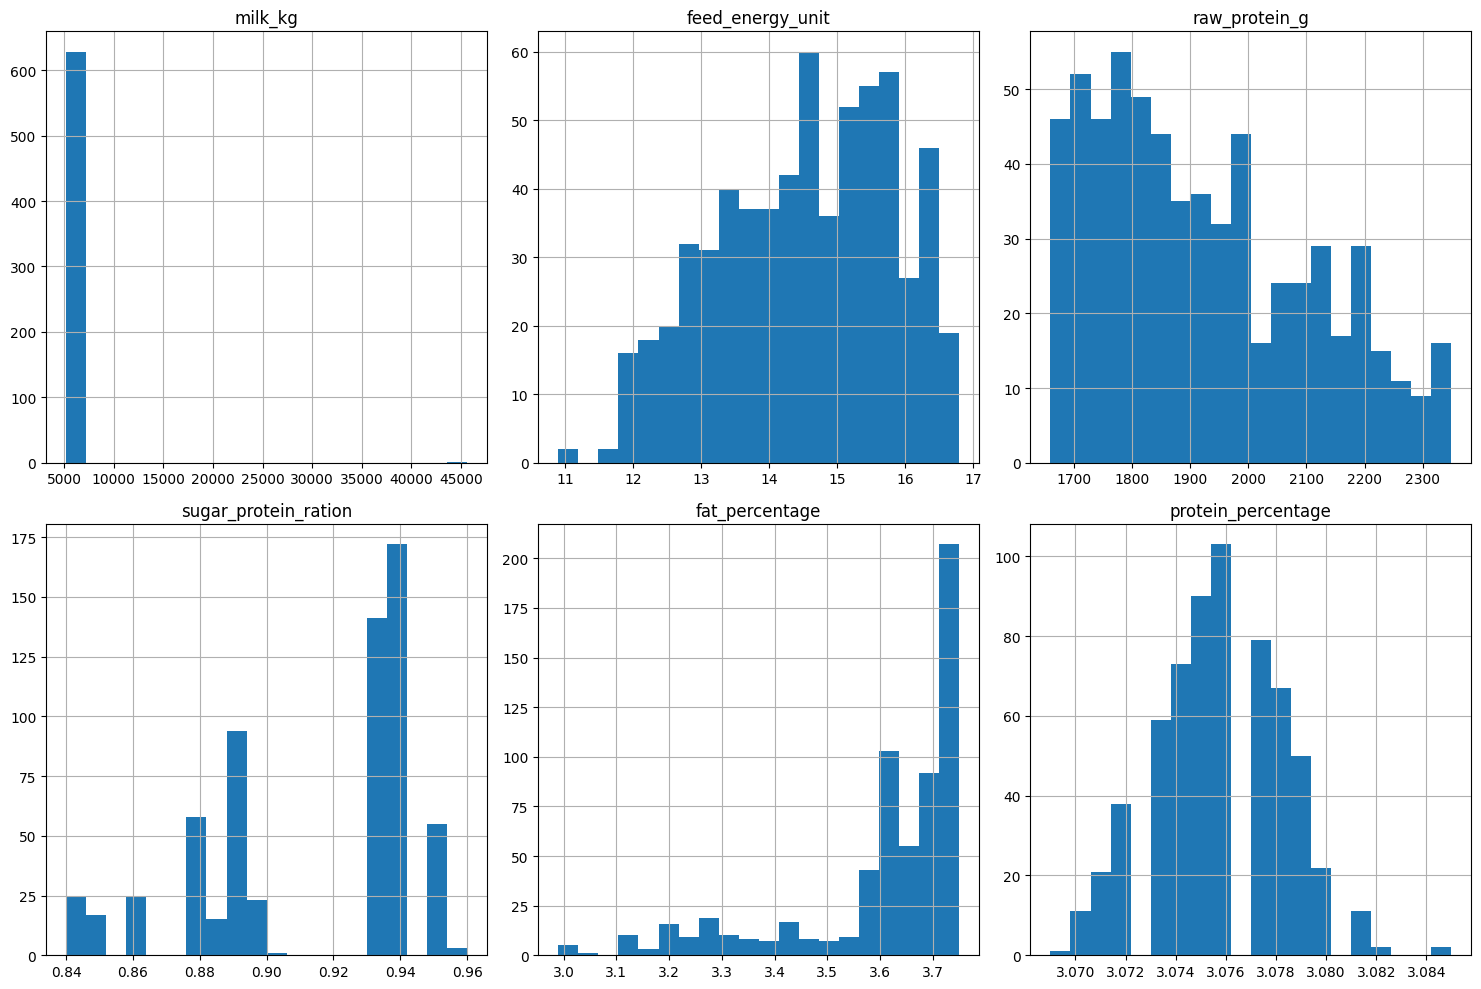

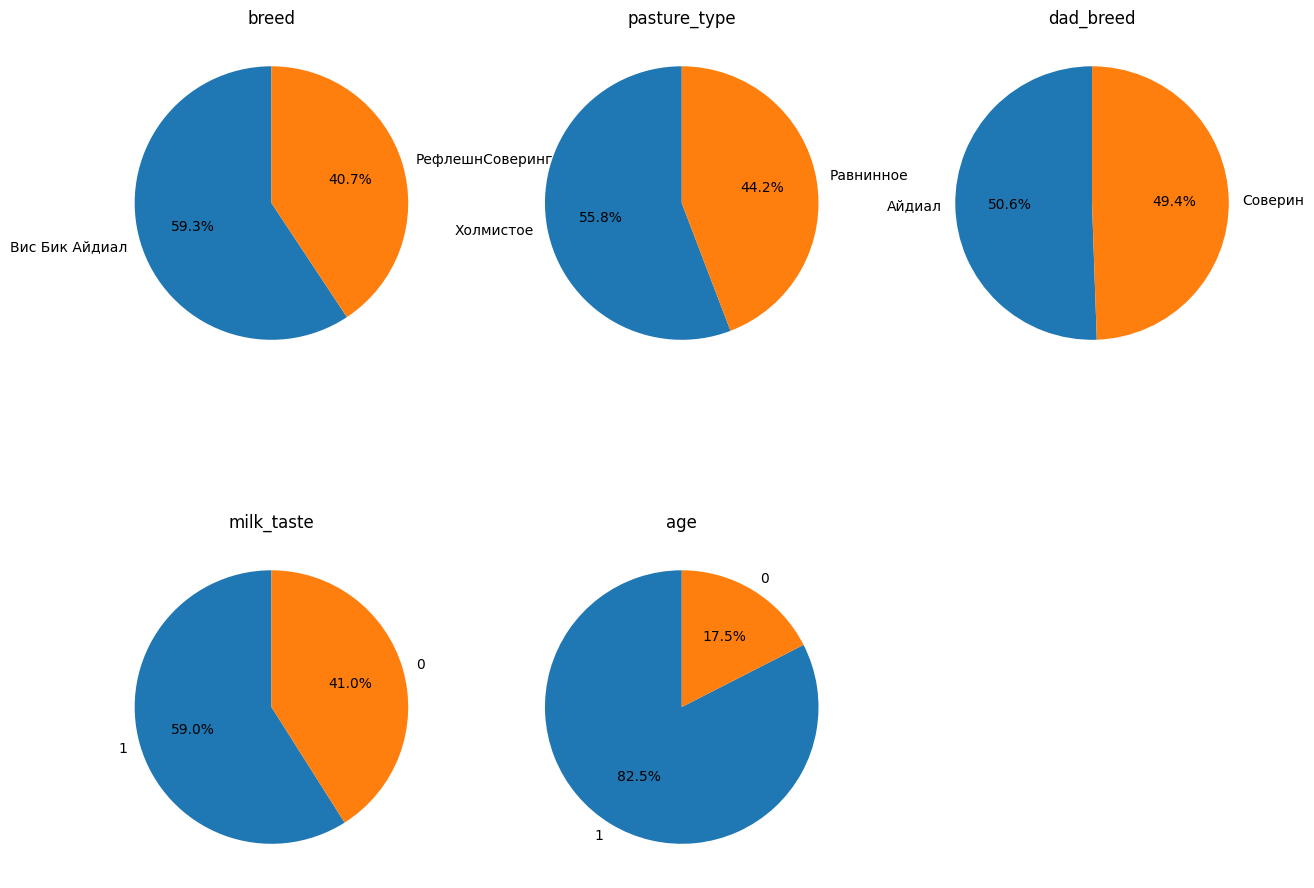

In [23]:
numerical_columns = ['milk_kg', 'feed_energy_unit', 'raw_protein_g', 'sugar_protein_ration', 'fat_percentage', 'protein_percentage']
categorical_columns = ['breed','pasture_type','dad_breed','milk_taste','age']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    df_ferma_main[column].hist(bins=20)
    plt.title(column)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)

    counts = df_ferma_main[column].value_counts()

    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(column)

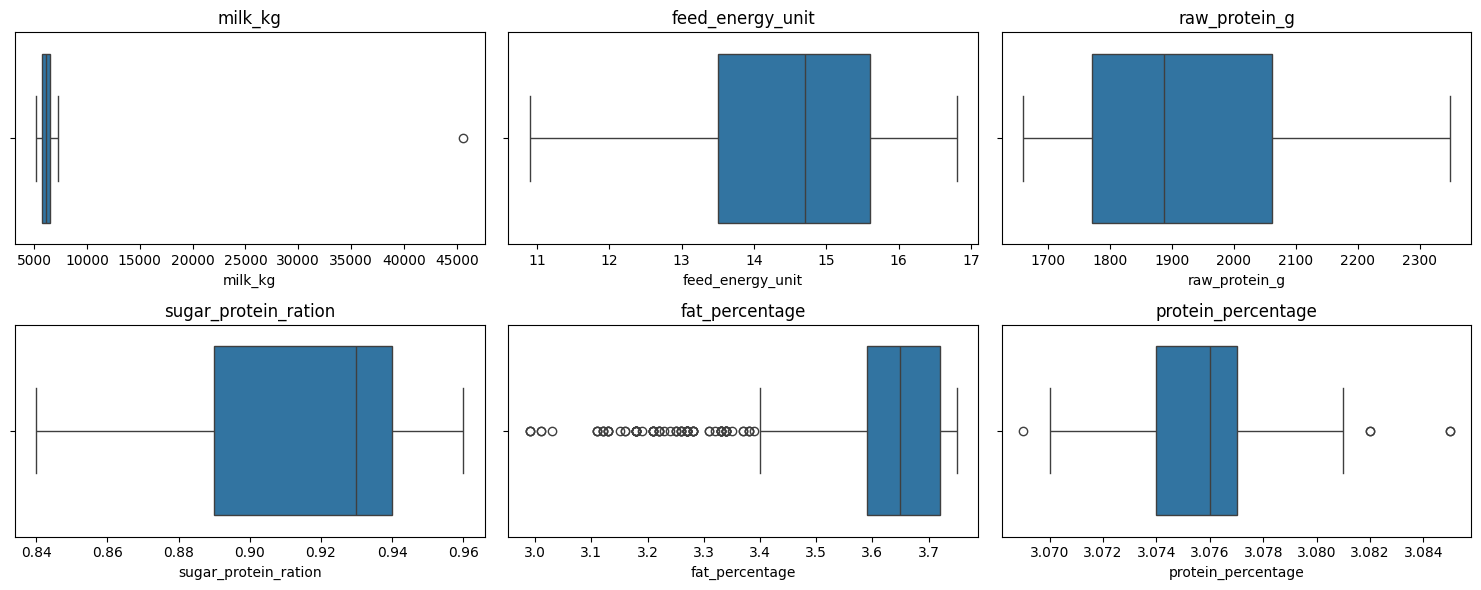

In [24]:
plt.figure(figsize=(15, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_ferma_main[column])
    plt.title(column)
    plt.xlabel(column)


plt.tight_layout()
plt.show()

Также видим что-то похожее на выбросы в жирах и белках. Посмотрим по ближе и удалим, если это не большая чать от всего df.

In [25]:
df_ferma_main[df_ferma_main['milk_kg'] > 10000]

id  milk_kg  feed_energy_unit  raw_protein_g  sugar_protein_ration  \
16  17    45616              11.5           1675                  0.93   

             breed pasture_type dad_breed  fat_percentage  protein_percentage  \
16  Вис Бик Айдиал    Холмистое    Айдиал            3.22               3.076   

    milk_taste  age  
16           1    1

In [26]:
df_ferma_main[df_ferma_main['fat_percentage'] < 3.1]

id  milk_kg  feed_energy_unit  raw_protein_g  sugar_protein_ration  \
17    18     5777              12.4           1873                 0.895   
554  555     5686              14.7           1712                 0.860   
558  559     5346              12.4           1837                 0.860   
561  562     5300              13.0           1785                 0.860   
568  569     5989              13.2           1721                 0.860   
576  577     5376              11.7           1825                 0.860   

               breed pasture_type dad_breed  fat_percentage  \
17    Вис Бик Айдиал    Холмистое    Айдиал            3.03   
554  РефлешнСоверинг    Холмистое    Айдиал            3.01   
558  РефлешнСоверинг    Холмистое   Соверин            3.01   
561   Вис Бик Айдиал    Равнинное   Соверин            2.99   
568   Вис Бик Айдиал    Холмистое   Соверин            2.99   
576  РефлешнСоверинг    Равнинное   Соверин            2.99   

     protein_percentage  milk_taste  age  
17                3.080           1    1  
554               3.074           1    1  
558               3.078           0    0  
561               3.077           0    0  
568               3.076           1    0  
576               3.076           0    0

In [27]:
df_ferma_main[(df_ferma_main['protein_percentage'] < 3.07) | (df_ferma_main['protein_percentage'] > 3.081)]

id  milk_kg  feed_energy_unit  raw_protein_g  sugar_protein_ration  \
77    78     5871              14.7           1795                 0.895   
240  241     5568              13.4           1733                 0.880   
426  427     6701              15.7           2068                 0.940   
471  472     5883              14.9           2159                 0.890   
517  518     5819              13.7           1968                 0.840   

               breed pasture_type dad_breed  fat_percentage  \
77    Вис Бик Айдиал    Равнинное    Айдиал            3.61   
240   Вис Бик Айдиал    Равнинное   Соверин            3.63   
426  РефлешнСоверинг    Холмистое    Айдиал            3.72   
471   Вис Бик Айдиал    Равнинное   Соверин            3.62   
517   Вис Бик Айдиал    Холмистое    Айдиал            3.15   

     protein_percentage  milk_taste  age  
77                3.082           1    1  
240               3.069           0    0  
426               3.082           1    1  
471               3.085           1    1  
517               3.085           1    1

Выбросы занимают меньше 2%, поэтому их можем удалить.

In [29]:
combined_indexes = df_ferma_main[df_ferma_main['fat_percentage'] < 3.08].index.union(
    df_ferma_main[df_ferma_main['milk_kg'] > 10000].index).union(
        df_ferma_main[(df_ferma_main['protein_percentage'] < 3.07) | (df_ferma_main['protein_percentage'] > 3.081)].index)
print(combined_indexes)

Index([16, 17, 77, 240, 426, 471, 517, 554, 558, 561, 568, 576], dtype='int64')


In [30]:
df_ferma_main = df_ferma_main.drop(combined_indexes).reset_index(drop=True)

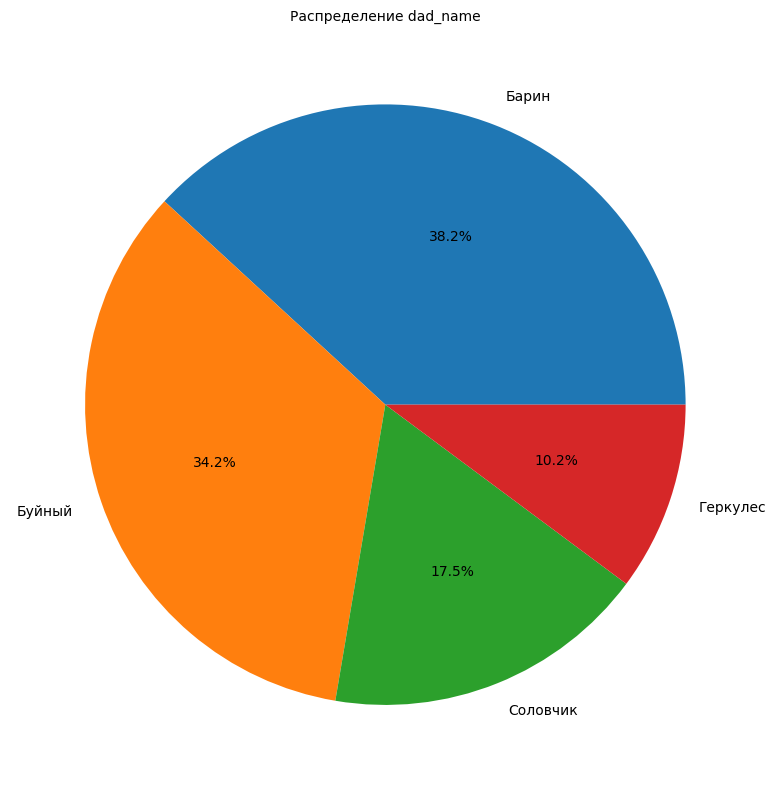

In [31]:
dad_counts = df_ferma_dad['dad_name'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dad_counts, labels=dad_counts.index, autopct='%1.1f%%')

plt.title('Распределение dad_name', fontsize=10)
plt.tight_layout()
plt.show()

У Барин и Буйный 2/3 всего потомства.

In [32]:
df_cow_buy

breed pasture_type dad_breed  dad_name  current_fat_percentage  \
0    Вис Бик Айдиал    Холмистое    Айдиал  Геркулес                    3.58   
1    Вис Бик Айдиал    Равнинное   Соверин    Буйный                    3.54   
2   РефлешнСоверинг    Равнинное   Соверин     Барин                    3.59   
3   РефлешнСоверинг    Холмистое    Айдиал    Буйный                    3.40   
4   РефлешнСоверинг    Равнинное    Айдиал    Буйный                    3.64   
5   РефлешнСоверинг    Равнинное   Соверин  Геркулес                    3.63   
6    Вис Бик Айдиал    Равнинное   Соверин    Буйный                    3.57   
7   РефлешнСоверинг    Холмистое    Айдиал    Буйный                    3.40   
8    Вис Бик Айдиал    Холмистое   Соверин  Соловчик                    3.73   
9   РефлешнСоверинг    Равнинное   Соверин  Геркулес                    3.73   
10   Вис Бик Айдиал    Холмистое    Айдиал  Геркулес                    3.68   
11   Вис Бик Айдиал    Холмистое   Соверин     Барин                    3.42   
12  РефлешнСоверинг    Холмистое    Айдиал    Буйный                    3.40   
13   Вис Бик Айдиал    Холмистое   Соверин  Соловчик                    3.73   
14  РефлешнСоверинг    Равнинное   Соверин  Геркулес                    3.77   
15   Вис Бик Айдиал    Равнинное   Соверин    Буйный                    3.34   

    current_protein_percentage  age  
0                        3.076    1  
1                        3.081    0  
2                        3.074    1  
3                        3.061    1  
4                        3.074    1  
5                        3.053    0  
6                        3.079    1  
7                        3.079    0  
8                        3.055    1  
9                        3.073    1  
10                       3.046    1  
11                       3.075    0  
12                       3.065    1  
13                       3.079    1  
14                       3.053    0  
15                       3.069    1

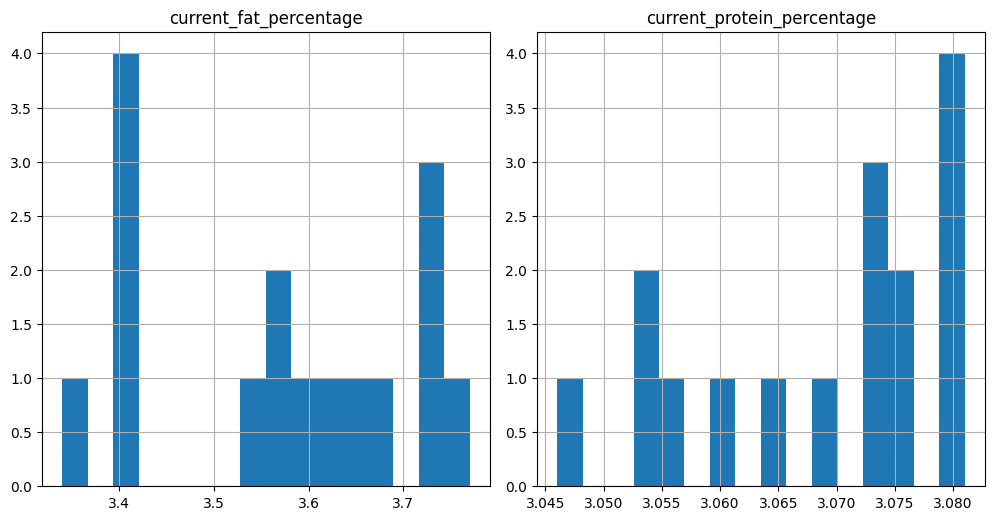

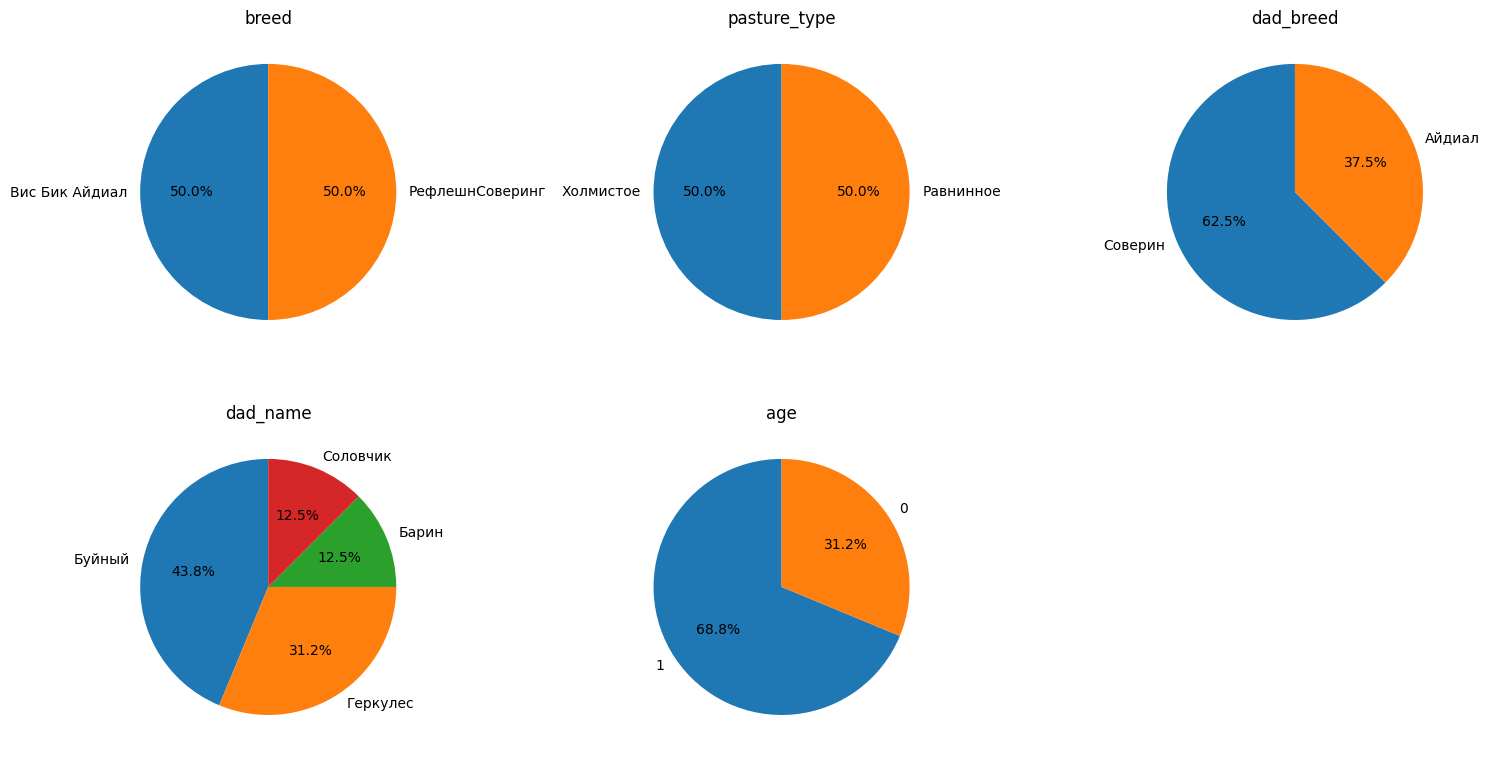

In [33]:
numerical_columns = ['current_fat_percentage', 'current_protein_percentage']
categorical_columns = ['breed','pasture_type','dad_breed','dad_name','age']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    df_cow_buy[column].hist(bins=16)
    plt.title(column)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)

    counts = df_cow_buy[column].value_counts()

    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.tight_layout()
    plt.title(column)

Исследовали три df. Удалили выбросы, они занимали 2% от всего df. Распределение удоя похоже на нормальное. Также ЭКЕ похоже на нормальное распределение со сдвигом в право. Распределение белка также похоже на нормальное. СПО и Жирность похоже на распределение Пуассона. Породы быков Айдиал на 10% больше, чем Рефленш Соверинг. Вкусное молоко состовляет 60%, а возраст старше 2 лет 83%.

## Корреляционный анализ

df_ferma_main, df_ferma_dad, df_cow_buy

Изучаем взаимосвязь между признаками: рассчитаем коэффициенты корреляции между всеми признаками.

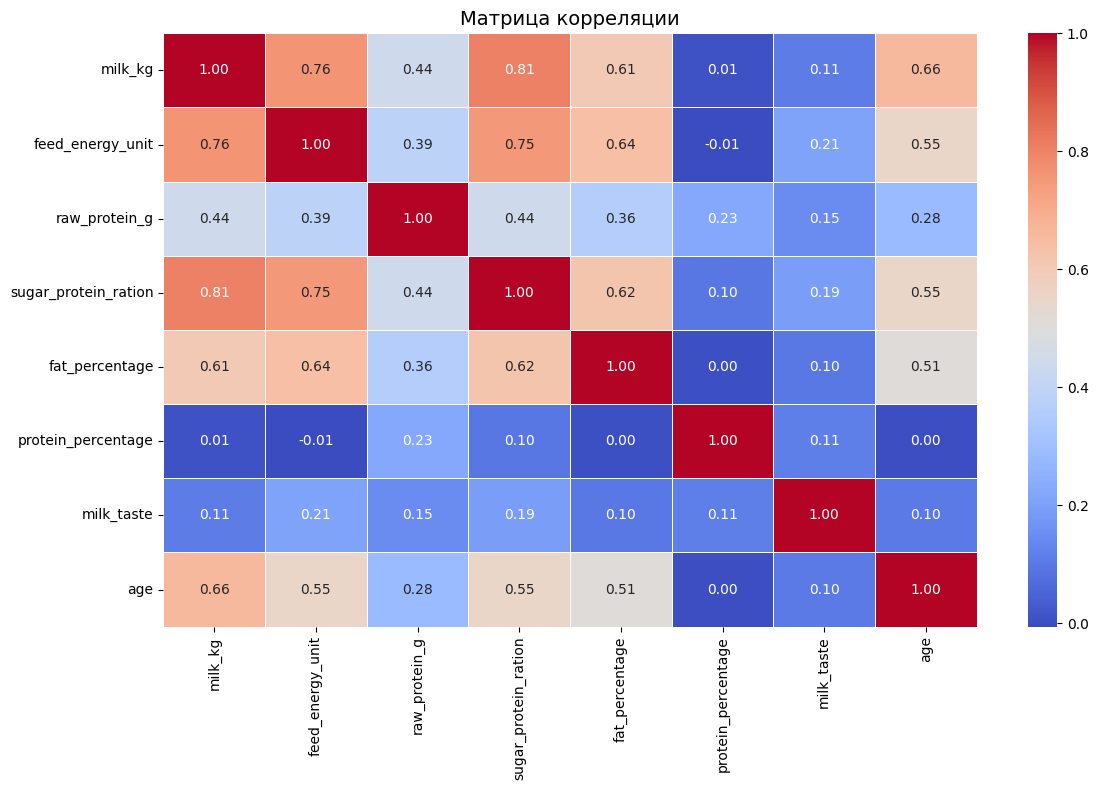

In [35]:
numeric_df = df_ferma_main.drop(columns=['id']).select_dtypes(include=['number'])

corr_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляции', fontsize=14)
plt.tight_layout()
plt.show()

Видим в ЭКЕ и СПО высокую корреляцию, в жирности и возрасте она средняя.

In [36]:
df_ferma = pd.merge(df_ferma_main, df_ferma_dad, on='id', how='left')
df_ferma

id  milk_kg  feed_energy_unit  raw_protein_g  sugar_protein_ration  \
0      1     5863              14.2           1743                 0.890   
1      2     5529              12.8           2138                 0.890   
2      3     5810              14.0           1854                 0.885   
3      4     5895              12.4           2012                 0.885   
4      5     5302              12.8           1675                 0.885   
..   ...      ...               ...            ...                   ...   
612  625     6812              15.4           1964                 0.940   
613  626     5513              12.9           1700                 0.880   
614  627     5970              14.4           1837                 0.880   
615  628     5746              13.8           1994                 0.890   
616  629     6503              16.2           2283                 0.940   

               breed pasture_type dad_breed  fat_percentage  \
0     Вис Бик Айдиал    Равнинное    Айдиал            3.58   
1     Вис Бик Айдиал    Равнинное   Соверин            3.54   
2    РефлешнСоверинг    Холмистое   Соверин            3.59   
3    РефлешнСоверинг    Холмистое    Айдиал            3.40   
4     Вис Бик Айдиал    Равнинное   Соверин            3.73   
..               ...          ...       ...             ...   
612  РефлешнСоверинг    Равнинное    Айдиал            3.74   
613  РефлешнСоверинг    Равнинное   Соверин            3.64   
614  РефлешнСоверинг    Холмистое   Соверин            3.64   
615  РефлешнСоверинг    Равнинное   Соверин            3.64   
616   Вис Бик Айдиал    Холмистое   Соверин            3.71   

     protein_percentage  milk_taste  age  dad_name  
0                 3.076           1    1    Буйный  
1                 3.079           1    0  Соловчик  
2                 3.074           0    1     Барин  
3                 3.075           0    1    Буйный  
4                 3.073           1    0     Барин  
..                  ...         ...  ...       ...  
612               3.075           0    1    Буйный  
613               3.073           1    0     Барин  
614               3.075           0    1     Барин  
615               3.077           1    1     Барин  
616               3.076           1    1  Соловчик  

[617 rows x 13 columns]

Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.

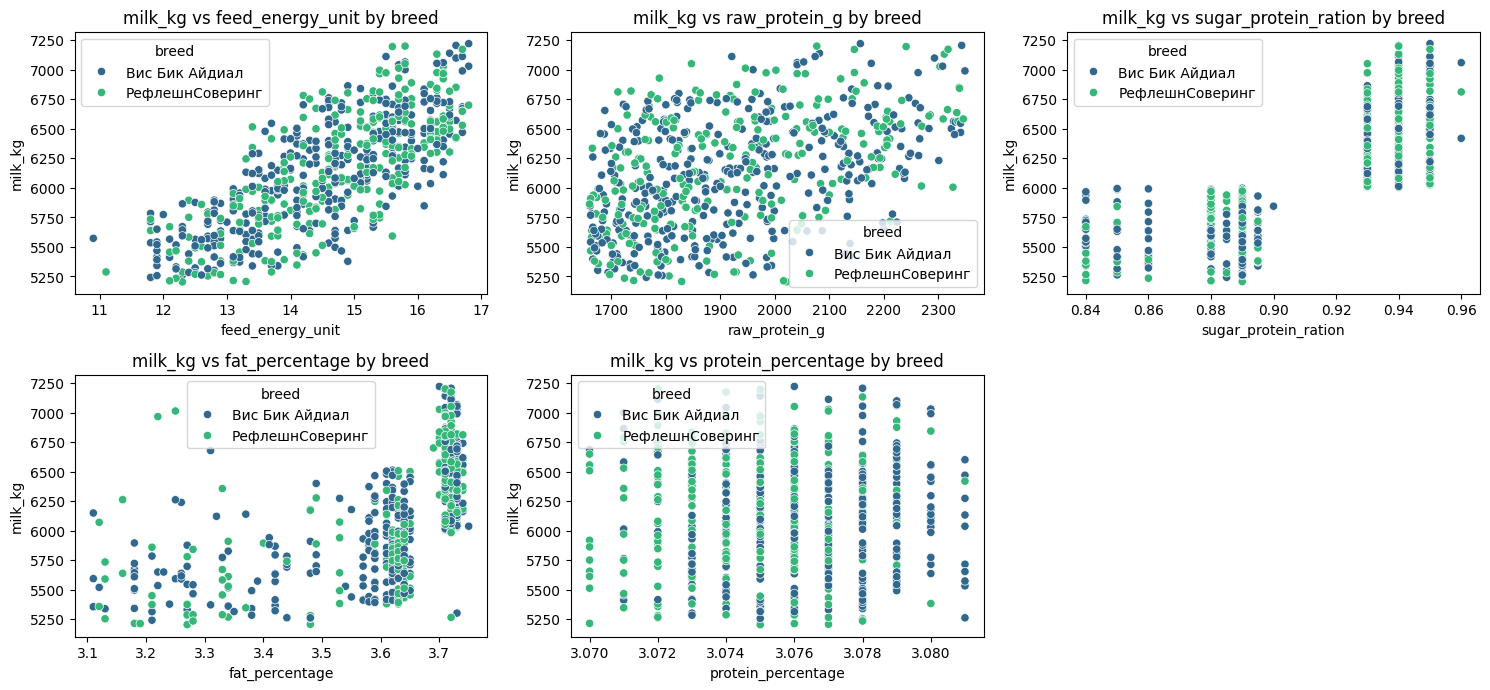

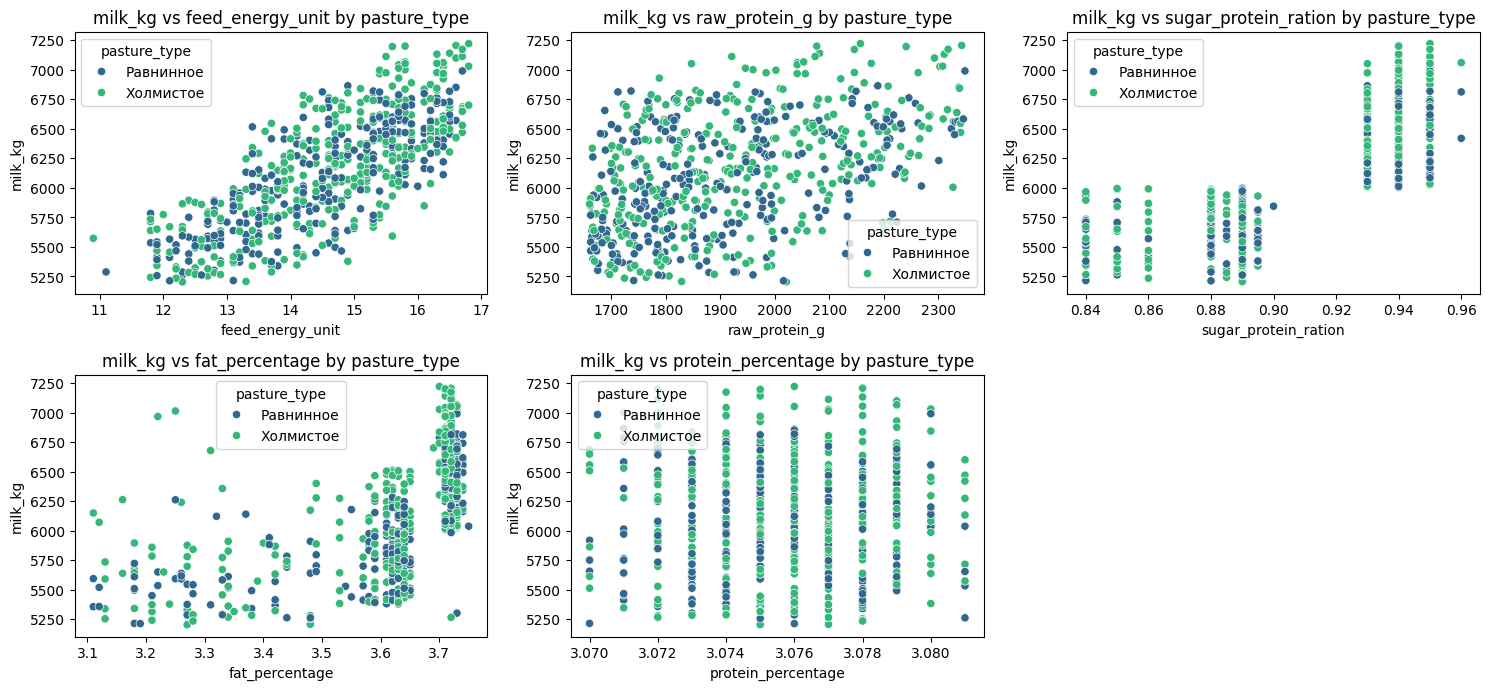

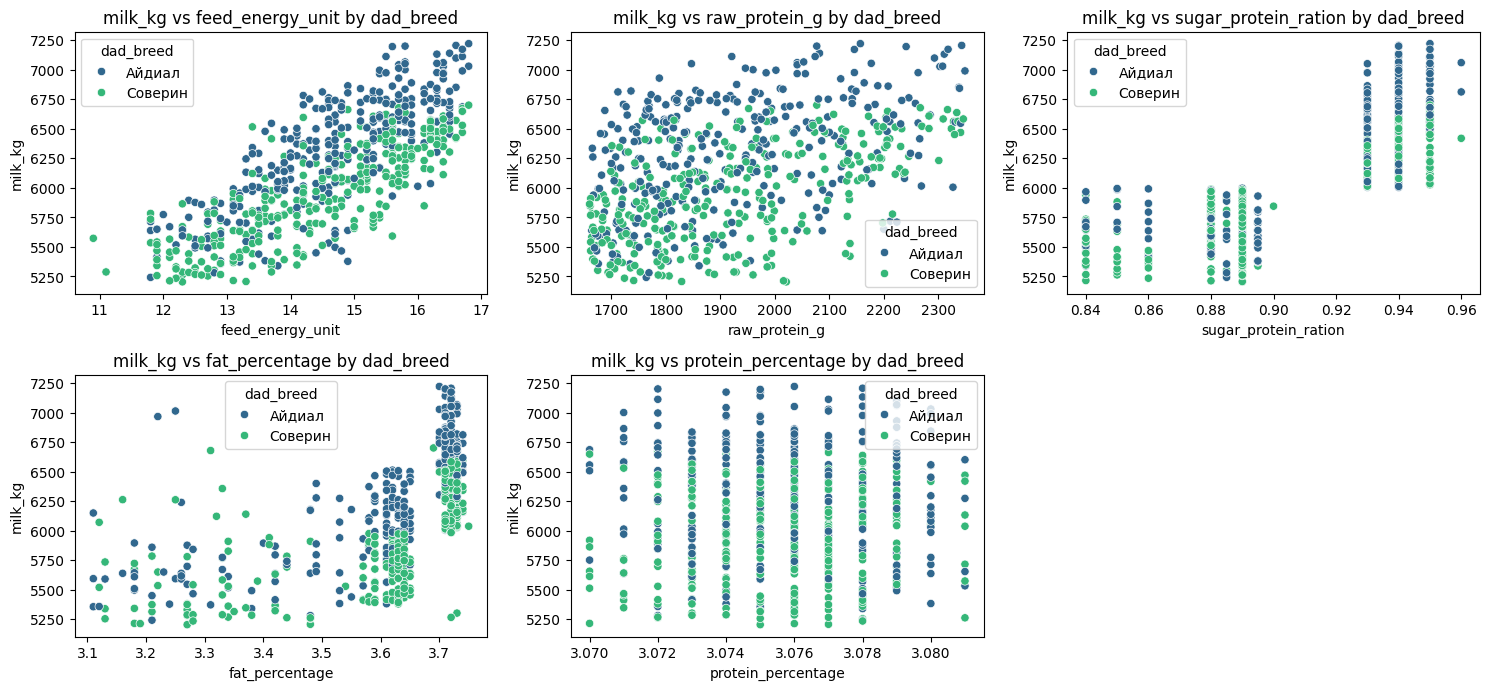

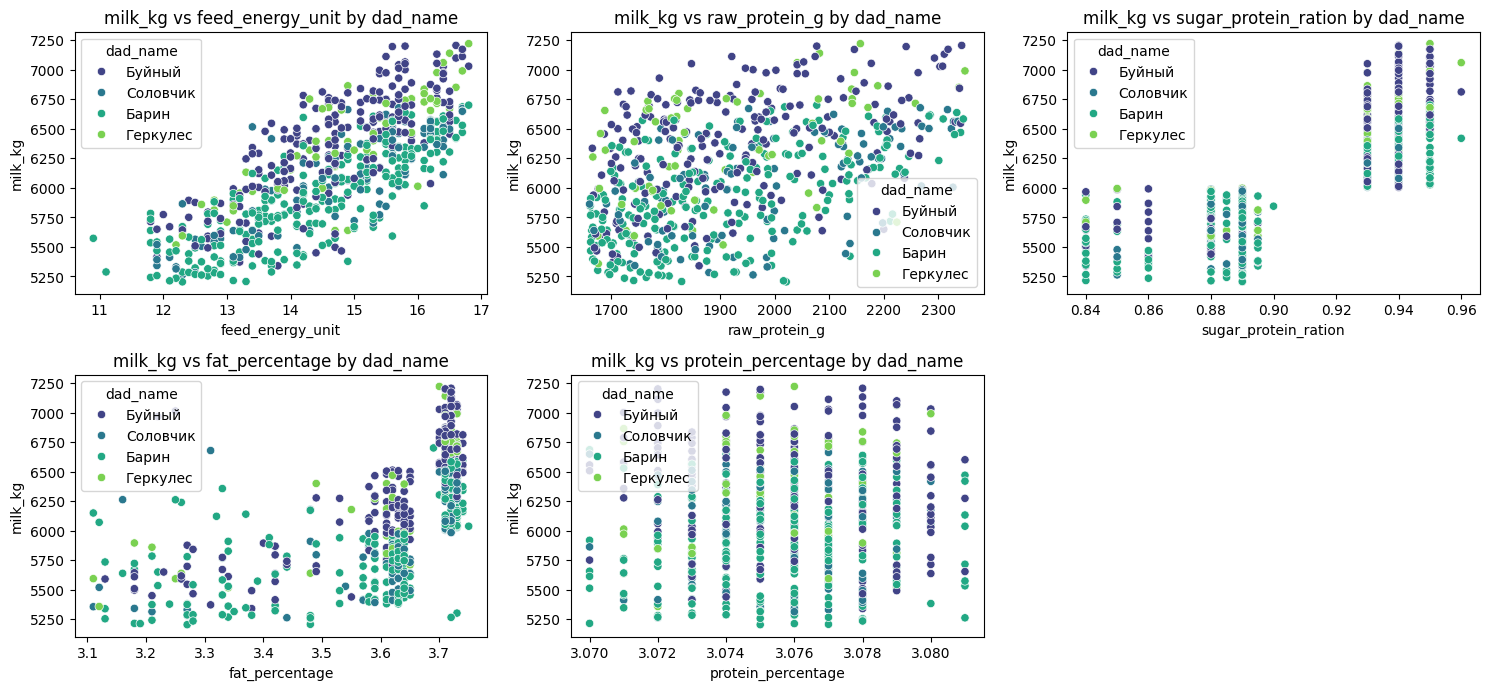

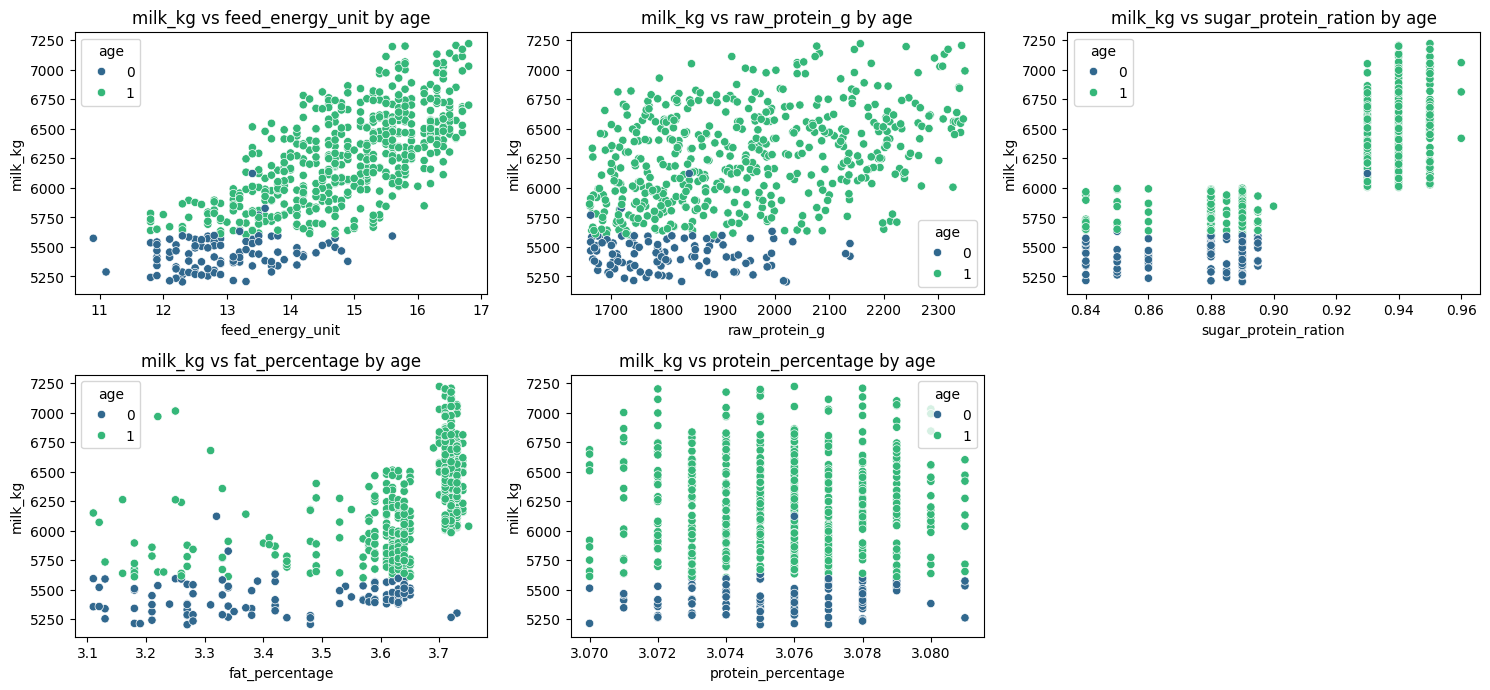

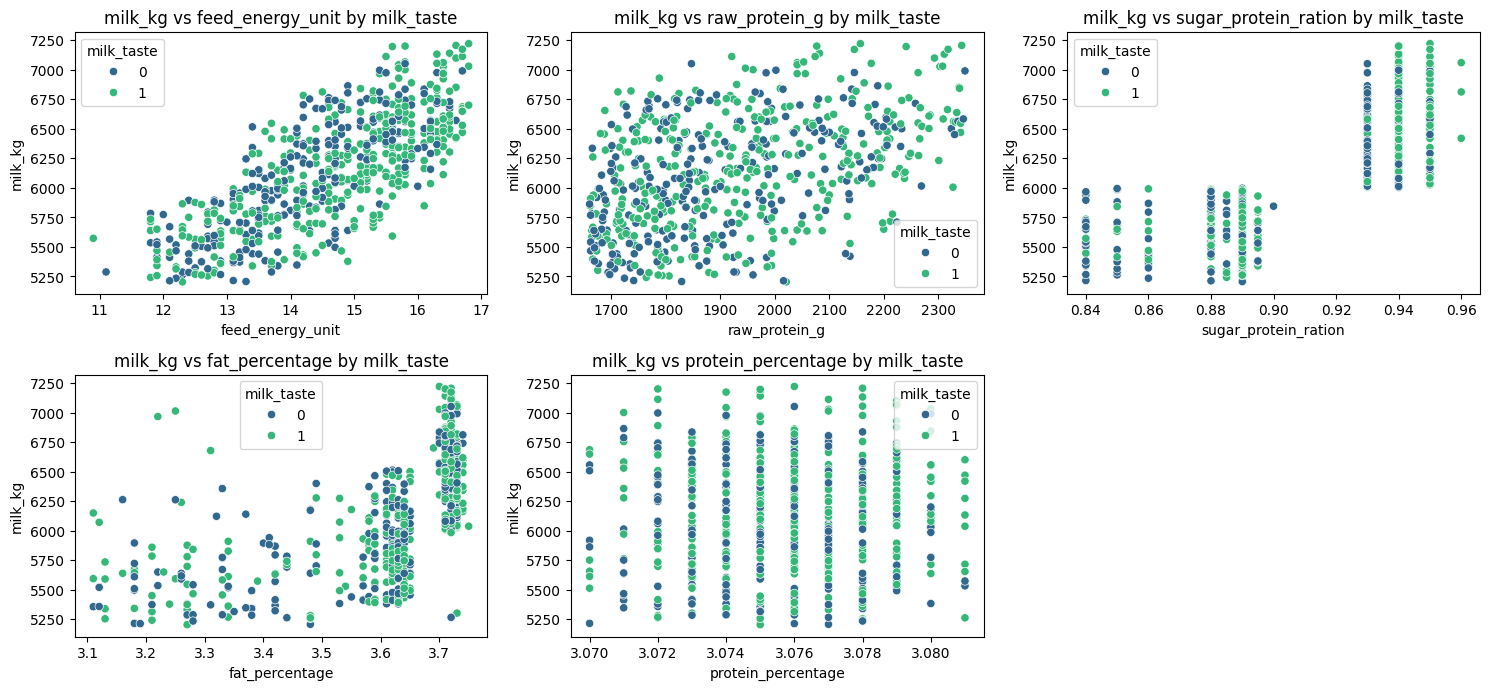

In [37]:
numerical_columns = ['feed_energy_unit', 'raw_protein_g', 'sugar_protein_ration',
                     'fat_percentage', 'protein_percentage']
categorical_columns = ['breed', 'pasture_type', 'dad_breed', 'dad_name', 'age', 'milk_taste']

# Построение диаграмм рассеивания
for categorical_column in categorical_columns:
    plt.figure(figsize=(15, 10))
    for i, numerical_column in enumerate(numerical_columns, 1):
      plt.subplot(3, 3, i)  # размещаем подграфики 2x4
      sns.scatterplot(x=df_ferma[numerical_column], y=df_ferma['milk_kg'], hue=df_ferma[categorical_column], palette='viridis')
      plt.title(f'milk_kg vs {numerical_column} by {categorical_column}')
      plt.xlabel(numerical_column)
      plt.ylabel('milk_kg')
    plt.tight_layout()
    plt.show()

ЭКЕ и СПО коррелируют между собой.
- feed_energy_unit от milt_kg видим положительную криволинейную связь.
- raw_protein_g от milt_kg видим отсутсвие связи.
- sugar_protein_ration от milt_kg видим положительную криволинейную связь.
- fat_percentage от milt_kg видим положительную криволинейную связь.
- protein_percentage от milt_kg связь отсутствует.

## Обучение модели линейной регрессии

Вам предстоит обучить три модели простой линейной регрессии.

Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.
- Используйте в качестве целевого признак Удой, кг.
- Отберите признаки, которые подходят для модели линейной регрессии, аргументируйте выбор. Опирайтесь не только на наличие или отсутствие линейной связи между признаками, но и на причинно-следственные связи между удоем коров и группами признаков из описания датасета.
- Разбейте данные на тренировочную и тестовую выборки.
- Кодируйте категориальные признаки с помощью OneHotEncoder.
- Масштабируйте количественные признаки с помощью StandardScaler.
- Обучите модель линейной регрессии на подготовленных данных.
- Оцените качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.
- Оформите выводы, укажите:
 - значение R² модели;
 - какие выводы следуют из анализа остатков;
 - нужны ли дополнительные исследования.

Используем в качестве целевого признака Удой, признаки возмем исходя из матрицы корреляции выше 0.6 и отца быка.

In [38]:
cat_col = [ 'age', 'dad_breed']
num_col = ['feed_energy_unit', 'sugar_protein_ration', 'fat_percentage']

In [39]:
X = df_ferma[cat_col + num_col].copy()
y = df_ferma['milk_kg'].copy()

X_train, X_test, y_train, y_test1 = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE
)

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [41]:
print("\nПреобразованные данные X_train:")
print(X_train_preprocessed)
print("\nПреобразованные данные X_test:")
print(X_test_preprocessed)


Преобразованные данные X_train:
[[ 0.81555032  0.81788604  0.63669096 ...  1.          1.
   0.        ]
 [-1.16351846 -2.26923283  0.26536604 ...  1.          1.
   0.        ]
 [-1.08740043 -1.96052095 -0.16784636 ...  0.          0.
   1.        ]
 ...
 [ 0.89166835  1.12659793  0.69857844 ...  1.          0.
   1.        ]
 [ 0.43496017  0.81788604  0.69857844 ...  1.          0.
   1.        ]
 [ 0.73943229  1.12659793  0.63669096 ...  1.          1.
   0.        ]]

Преобразованные данные X_test:
[[ 0.13048805  0.50917415  0.69857844 ...  1.          1.
   0.        ]
 [ 1.65284865  1.12659793  0.69857844 ...  1.          1.
   0.        ]
 [ 1.04390441  0.50917415  0.76046593 ...  1.          1.
   0.        ]
 ...
 [-0.55457422 -1.03438528  0.20347855 ...  0.          0.
   1.        ]
 [-2.07693482 -2.26923283 -2.95278325 ...  1.          0.
   1.        ]
 [ 1.34837653  0.81788604  0.76046593 ...  1.          1.
   0.        ]]


In [42]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [43]:
# Прогнозы
y_pred1 = model.predict(X_test_preprocessed)
print(f"Прогнозы предсказанного и настоящего.{y_pred1[1], y_test1.reset_index().loc[1, 'milk_kg']}")

r2_1 = r2_score(y_test1, y_pred1)
print(f"\nR^2 на тестовой выборке: {r2_1:.2f}")

Прогнозы предсказанного и настоящего.(np.float64(6753.646948197328), np.int64(7174))

R^2 на тестовой выборке: 0.80


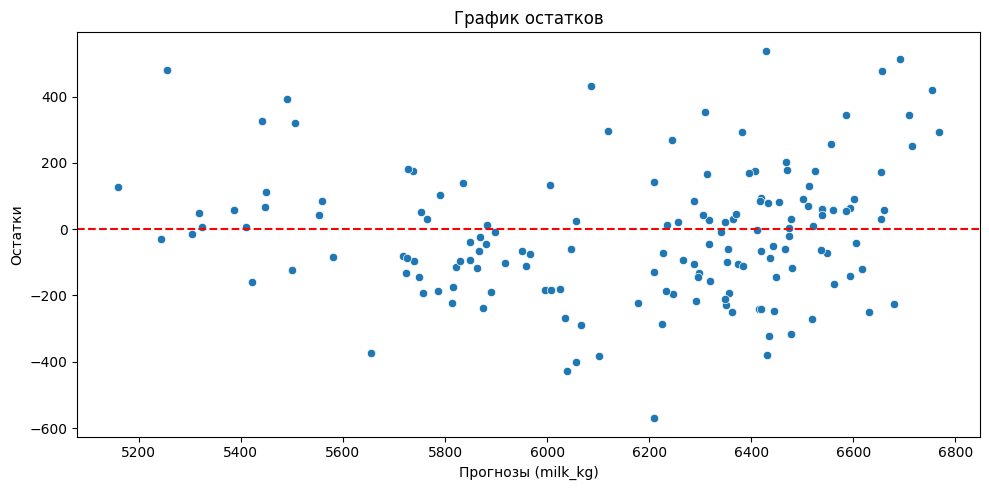

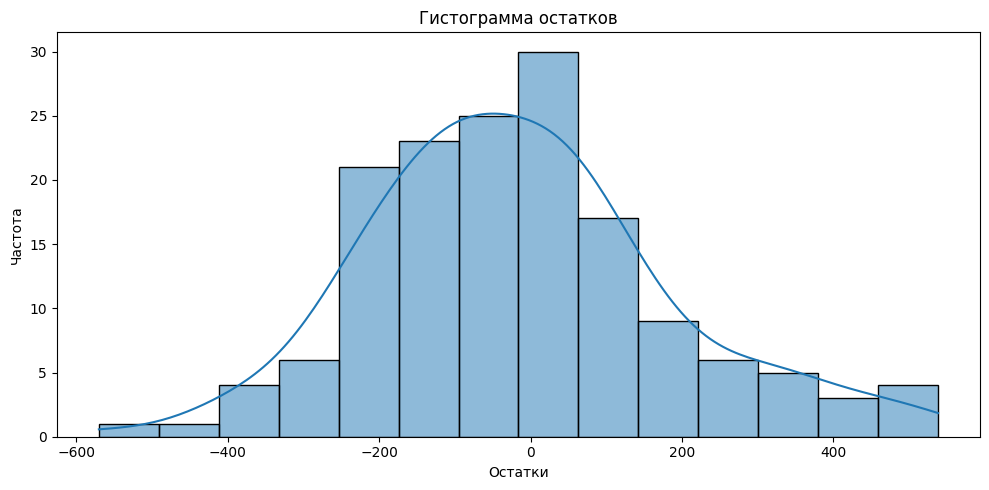

In [44]:
# Вычисление остатков
residuals1 = y_test1 - y_pred1

# График остатков
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred1, y=residuals1)
plt.axhline(0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Прогнозы (milk_kg)')
plt.ylabel('Остатки')
plt.tight_layout()
plt.show()

# Гистограмма остатков
plt.figure(figsize=(10, 5))
sns.histplot(residuals1, kde=True)
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

R^2 модели: 0.80. На графике остатков видны точки как выше, так и ниже оси 0, что говорит о том, что линейная модель более менее правильно описывает данные. На гистограмме остатков распределение близко к нормальному. Возможно присутствуют нелинейные зависимости.

Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.
- Посмотрите на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключите нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать:
  - Вы обнаружите, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу.
  - Вы обнаружите, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.
- Повторите шаги из пункта 1 и создайте вторую модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.

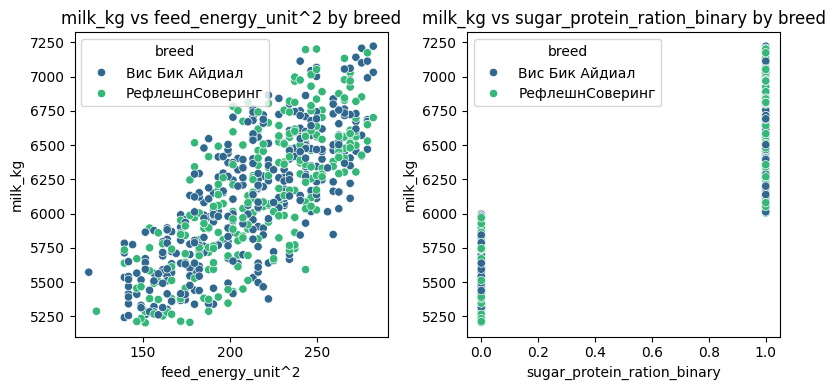

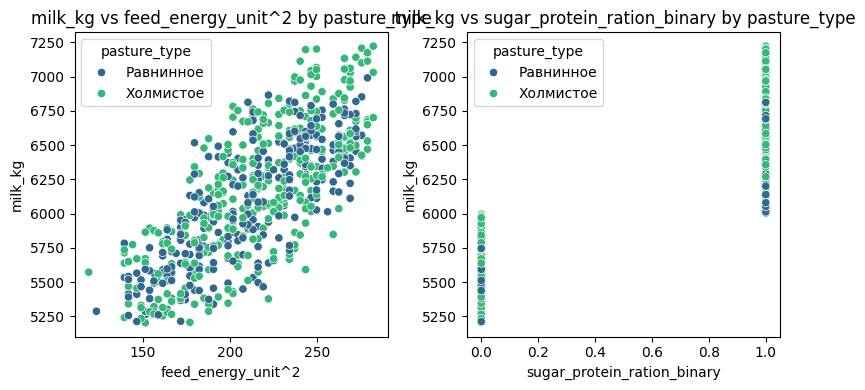

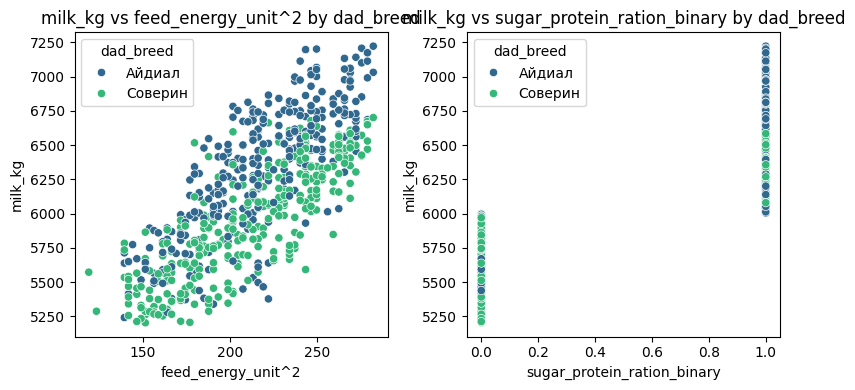

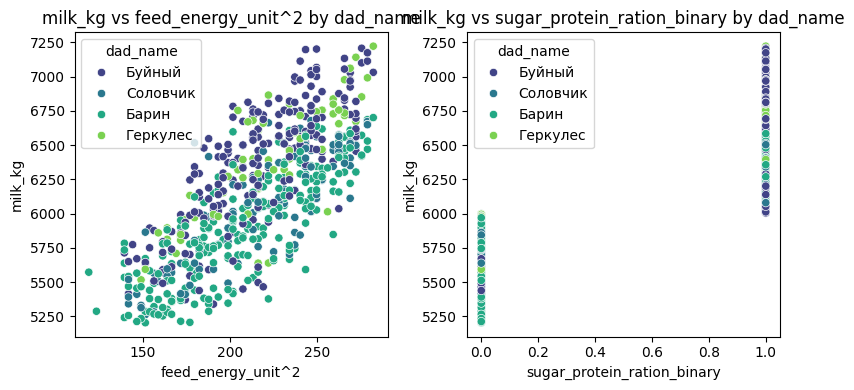

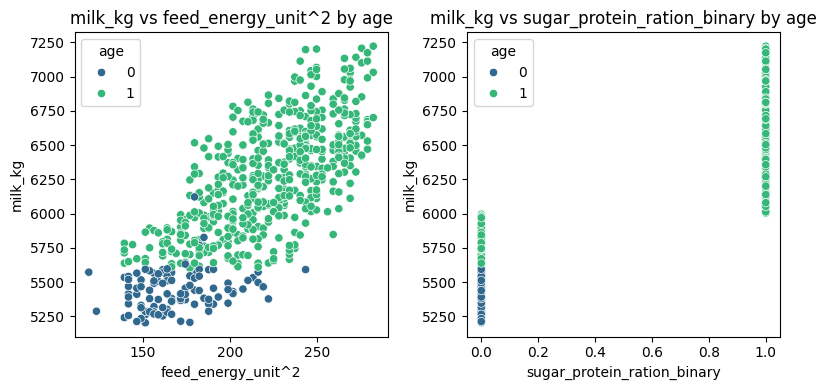

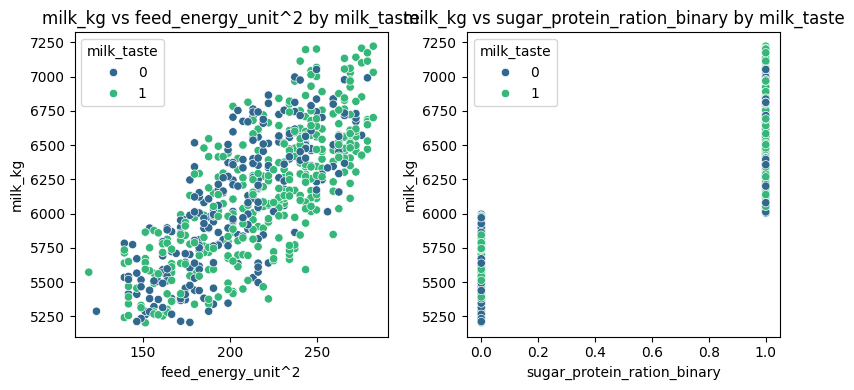

In [45]:
df_ferma['feed_energy_unit_squared'] = df_ferma['feed_energy_unit']**2
df_ferma['sugar_protein_ration_binary'] = (df_ferma['sugar_protein_ration'] > 0.92).astype(int)

for categorical_column in categorical_columns:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df_ferma['feed_energy_unit_squared'], y=df_ferma['milk_kg'], hue=df_ferma[categorical_column], palette='viridis')
    plt.title(f'milk_kg vs feed_energy_unit^2 by {categorical_column}')
    plt.xlabel('feed_energy_unit^2')
    plt.ylabel('milk_kg')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df_ferma['sugar_protein_ration_binary'], y=df_ferma['milk_kg'], hue=df_ferma[categorical_column], palette='viridis')
    plt.title(f'milk_kg vs sugar_protein_ration_binary by {categorical_column}')
    plt.xlabel('sugar_protein_ration_binary')
    plt.ylabel('milk_kg')

    plt.tight_layout()
    plt.show()

In [48]:
X = df_ferma[cat_col + num_col].copy()
y = df_ferma['milk_kg'].copy()
#Отделим значения, что бы получить линейную связь
X['sugar_protein_ration'] = (X['sugar_protein_ration'] > 0.92).astype(int)
#Возведем в квадрат, что бы получить линейную связь
X['feed_energy_unit'] = X['feed_energy_unit']**2


X_train, X_test, y_train, y_test2 = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE
)

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [50]:
print("\nПреобразованные данные X_train:")
print(X_train_preprocessed)
print("\nПреобразованные данные X_test:")
print(X_test_preprocessed)


Преобразованные данные X_train:
[[ 0.81047991  0.82092207  0.63669096 ...  1.          1.
   0.        ]
 [-1.16196082 -1.21814243  0.26536604 ...  1.          1.
   0.        ]
 [-1.09272911 -1.21814243 -0.16784636 ...  0.          0.
   1.        ]
 ...
 [ 0.89350492  0.82092207  0.69857844 ...  1.          0.
   1.        ]
 [ 0.40331255  0.82092207  0.69857844 ...  1.          0.
   1.        ]
 [ 0.72798542  0.82092207  0.63669096 ...  1.          1.
   0.        ]]

Преобразованные данные X_test:
[[ 0.08712786  0.82092207  0.69857844 ...  1.          1.
   0.        ]
 [ 1.7529331   0.82092207  0.69857844 ...  1.          1.
   0.        ]
 [ 1.06114646  0.82092207  0.76046593 ...  1.          1.
   0.        ]
 ...
 [-0.59325279 -1.21814243  0.20347855 ...  0.          0.
   1.        ]
 [-1.95136152 -1.21814243 -2.95278325 ...  1.          0.
   1.        ]
 [ 1.40279569  0.82092207  0.76046593 ...  1.          1.
   0.        ]]


In [51]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [52]:
# Прогнозы
y_pred2 = model.predict(X_test_preprocessed)
print(f"Прогнозы предсказанного и настоящего.{y_pred2[1], y_test2.reset_index().loc[1, 'milk_kg']}")

r2_2 = r2_score(y_test2, y_pred2)
print(f"\nR^2 на тестовой выборке: {r2_2:.2f}")

Прогнозы предсказанного и настоящего.(np.float64(6712.043491831377), np.int64(7174))

R^2 на тестовой выборке: 0.82


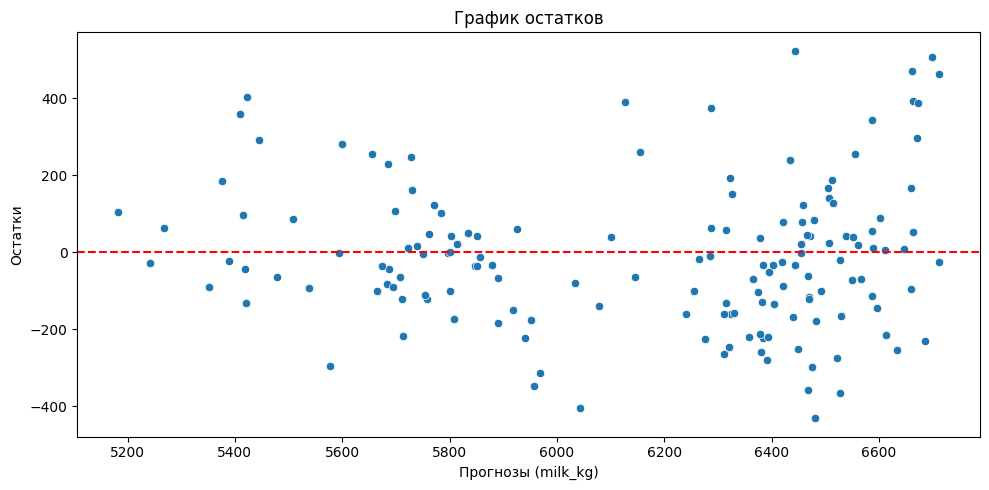

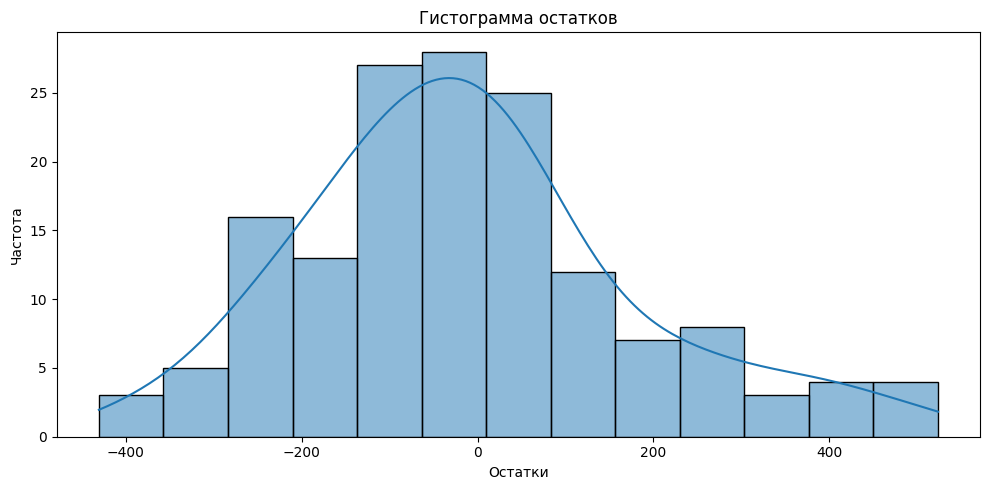

In [53]:
# Вычисление остатков
residuals2 = y_test2 - y_pred2

# График остатков
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred2, y=residuals2)
plt.axhline(0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Прогнозы (milk_kg)')
plt.ylabel('Остатки')
plt.tight_layout()
plt.show()

# Гистограмма остатков
plt.figure(figsize=(10, 5))
sns.histplot(residuals2, kde=True)
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Добавьте в данные новый признак и обучите на них третью модель LinearRegression.
- Добавьте признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.
- Устраните нелинейность между признаками.
- Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.

In [54]:
cat_col = [ 'age', 'dad_breed', 'dad_name']
num_col = ['feed_energy_unit', 'sugar_protein_ration', 'fat_percentage']

X = df_ferma[cat_col + num_col].copy()
y = df_ferma['milk_kg'].copy()

#Отделим значения, что бы получить линейную связь
X['sugar_protein_ration'] = (X['sugar_protein_ration'] > 0.92).astype(int)
#Возведем в квадрат, что бы получить линейную связь
X['feed_energy_unit'] = X['feed_energy_unit']**2


X_train, X_test, y_train, y_test3 = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE
)

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [56]:
print("\nПреобразованные данные X_train:")
print(X_train_preprocessed)
print("\nПреобразованные данные X_test:")
print(X_test_preprocessed)


Преобразованные данные X_train:
[[ 0.81047991  0.82092207  0.63669096 ...  1.          0.
   0.        ]
 [-1.16196082 -1.21814243  0.26536604 ...  0.          1.
   0.        ]
 [-1.09272911 -1.21814243 -0.16784636 ...  0.          0.
   0.        ]
 ...
 [ 0.89350492  0.82092207  0.69857844 ...  0.          0.
   0.        ]
 [ 0.40331255  0.82092207  0.69857844 ...  0.          0.
   1.        ]
 [ 0.72798542  0.82092207  0.63669096 ...  1.          0.
   0.        ]]

Преобразованные данные X_test:
[[ 0.08712786  0.82092207  0.69857844 ...  1.          0.
   0.        ]
 [ 1.7529331   0.82092207  0.69857844 ...  1.          0.
   0.        ]
 [ 1.06114646  0.82092207  0.76046593 ...  1.          0.
   0.        ]
 ...
 [-0.59325279 -1.21814243  0.20347855 ...  0.          0.
   1.        ]
 [-1.95136152 -1.21814243 -2.95278325 ...  0.          0.
   0.        ]
 [ 1.40279569  0.82092207  0.76046593 ...  0.          1.
   0.        ]]


In [57]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [58]:
# Прогнозы
y_pred3 = model.predict(X_test_preprocessed)
print(f"Прогнозы предсказанного и настоящего.{y_pred3[1], y_test3.reset_index().loc[1, 'milk_kg']}")

r2_3 = r2_score(y_test3, y_pred3)
print(f"\nR^2 на тестовой выборке: {r2_3:.2f}")

Прогнозы предсказанного и настоящего.(np.float64(6741.036618448083), np.int64(7174))

R^2 на тестовой выборке: 0.83


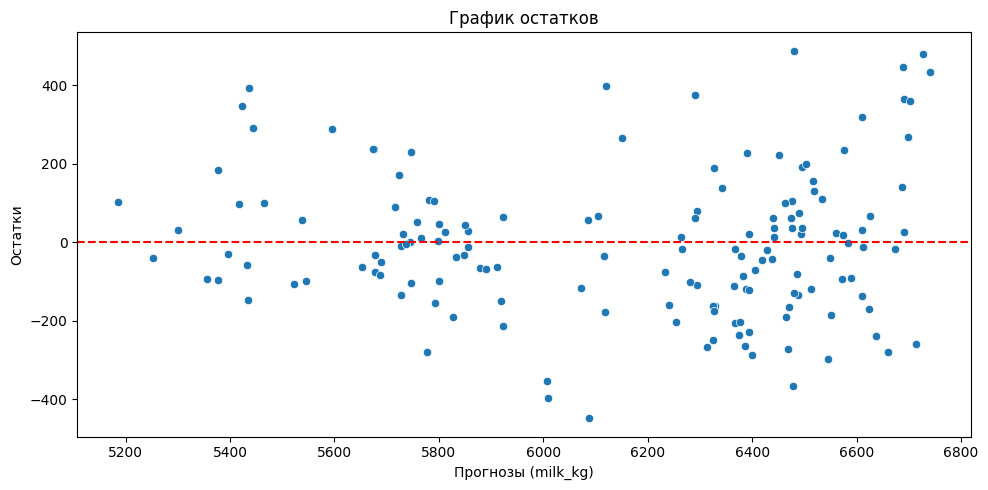

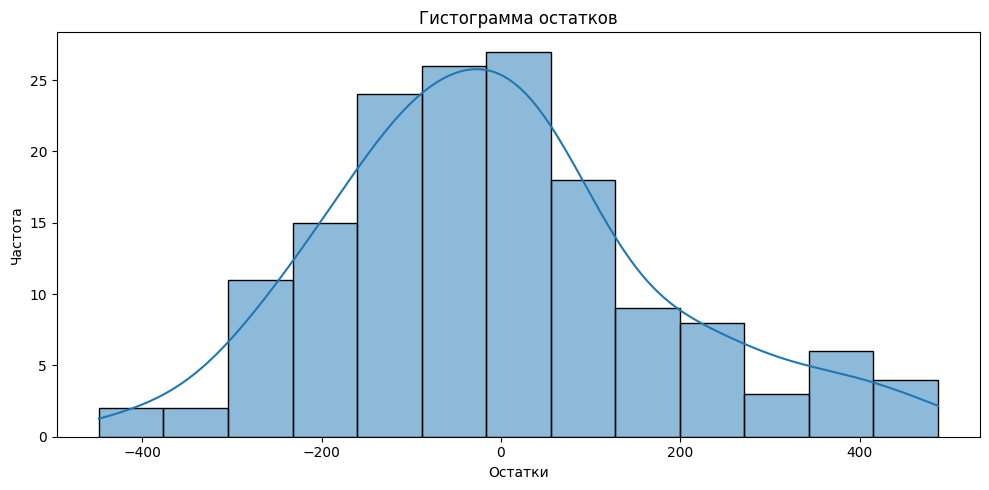

In [59]:
# Вычисление остатков
residuals3 = y_test3 - y_pred3

# График остатков
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred3, y=residuals3)
plt.axhline(0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Прогнозы (milk_kg)')
plt.ylabel('Остатки')
plt.tight_layout()
plt.show()

# Гистограмма остатков
plt.figure(figsize=(10, 5))
sns.histplot(residuals3, kde=True)
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.

In [60]:
print('Первая модель')
print(r2_1)
print('Вторая модель')
print(r2_2)
print('Третья модель')
print(r2_3)

Первая модель
0.8013830406429278
Вторая модель
0.8203453803996368
Третья модель
0.8324149809867356


Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.
- Выберите лучшую модель;
- Укажите доверительный интервал прогноза лучшей модели. Для этого рассчитайте квантили ошибки модели на тренировочных данных.

In [62]:
mse1 = mean_squared_error(y_test1, y_pred1)
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(y_test1, y_pred1)

mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(y_test2, y_pred2)

mse3 = mean_squared_error(y_test3, y_pred3)
rmse3 = np.sqrt(mse3)
mae3 = mean_absolute_error(y_test3, y_pred3)

print(f'1 модель: MSE {mse1:.2f}, RMSE {rmse1:.2f}, MAE {mae1:.2f}')
print(f'2 модель: MSE {mse2:.2f}, RMSE {rmse2:.2f}, MAE {mae2:.2f}')
print(f'3 модель: MSE {mse3:.2f}, RMSE {rmse3:.2f}, MAE {mae3:.2f}')

1 модель: MSE 39720.37, RMSE 199.30, MAE 155.73
2 модель: MSE 35928.19, RMSE 189.55, MAE 145.91
3 модель: MSE 33514.45, RMSE 183.07, MAE 141.86


3 модель имеет самую маленькую ошибку из всех.

С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
- Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.
- Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
- Получите прогноз удоя коров.

In [63]:
df_cow_buy['feed_energy_unit'] = df_ferma['feed_energy_unit'].mean()*1.05
df_cow_buy['feed_energy_unit'] = df_cow_buy['feed_energy_unit'] ** 2
df_cow_buy['raw_protein_g'] = df_ferma['raw_protein_g'].mean()*1.05
df_cow_buy['sugar_protein_ration'] = df_ferma['sugar_protein_ration'].mean()*1.05
df_cow_buy.loc[df_cow_buy['sugar_protein_ration'] >= 0.92, 'sugar_protein_ration'] = 1
df_cow_buy.loc[df_cow_buy['sugar_protein_ration'] < 0.92, 'sugar_protein_ration'] = 0
df_cow_buy = df_cow_buy.rename(columns={'current_fat_percentage': 'fat_percentage'})
df_cow_buy.head()

breed pasture_type dad_breed  dad_name  fat_percentage  \
0   Вис Бик Айдиал    Холмистое    Айдиал  Геркулес            3.58   
1   Вис Бик Айдиал    Равнинное   Соверин    Буйный            3.54   
2  РефлешнСоверинг    Равнинное   Соверин     Барин            3.59   
3  РефлешнСоверинг    Холмистое    Айдиал    Буйный            3.40   
4  РефлешнСоверинг    Равнинное    Айдиал    Буйный            3.64   

   current_protein_percentage  age  feed_energy_unit  raw_protein_g  \
0                       3.076    1        233.893646    2021.113857   
1                       3.081    0        233.893646    2021.113857   
2                       3.074    1        233.893646    2021.113857   
3                       3.061    1        233.893646    2021.113857   
4                       3.074    1        233.893646    2021.113857   

   sugar_protein_ration  
0                   1.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0

In [64]:
cat_col = [ 'age', 'dad_breed', 'dad_name']
num_col = ['feed_energy_unit', 'sugar_protein_ration', 'fat_percentage']

X = df_cow_buy[cat_col + num_col].copy()

X = preprocessor.fit_transform(X)
y_pred4 = model.predict(X)
df_cow_buy['milk_kg'] = y_pred4
df_cow_buy

breed pasture_type dad_breed  dad_name  fat_percentage  \
0    Вис Бик Айдиал    Холмистое    Айдиал  Геркулес            3.58   
1    Вис Бик Айдиал    Равнинное   Соверин    Буйный            3.54   
2   РефлешнСоверинг    Равнинное   Соверин     Барин            3.59   
3   РефлешнСоверинг    Холмистое    Айдиал    Буйный            3.40   
4   РефлешнСоверинг    Равнинное    Айдиал    Буйный            3.64   
5   РефлешнСоверинг    Равнинное   Соверин  Геркулес            3.63   
6    Вис Бик Айдиал    Равнинное   Соверин    Буйный            3.57   
7   РефлешнСоверинг    Холмистое    Айдиал    Буйный            3.40   
8    Вис Бик Айдиал    Холмистое   Соверин  Соловчик            3.73   
9   РефлешнСоверинг    Равнинное   Соверин  Геркулес            3.73   
10   Вис Бик Айдиал    Холмистое    Айдиал  Геркулес            3.68   
11   Вис Бик Айдиал    Холмистое   Соверин     Барин            3.42   
12  РефлешнСоверинг    Холмистое    Айдиал    Буйный            3.40   
13   Вис Бик Айдиал    Холмистое   Соверин  Соловчик            3.73   
14  РефлешнСоверинг    Равнинное   Соверин  Геркулес            3.77   
15   Вис Бик Айдиал    Равнинное   Соверин    Буйный            3.34   

    current_protein_percentage  age  feed_energy_unit  raw_protein_g  \
0                        3.076    1        233.893646    2021.113857   
1                        3.081    0        233.893646    2021.113857   
2                        3.074    1        233.893646    2021.113857   
3                        3.061    1        233.893646    2021.113857   
4                        3.074    1        233.893646    2021.113857   
5                        3.053    0        233.893646    2021.113857   
6                        3.079    1        233.893646    2021.113857   
7                        3.079    0        233.893646    2021.113857   
8                        3.055    1        233.893646    2021.113857   
9                        3.073    1        233.893646    2021.113857   
10                       3.046    1        233.893646    2021.113857   
11                       3.075    0        233.893646    2021.113857   
12                       3.065    1        233.893646    2021.113857   
13                       3.079    1        233.893646    2021.113857   
14                       3.053    0        233.893646    2021.113857   
15                       3.069    1        233.893646    2021.113857   

    sugar_protein_ration      milk_kg  
0                    1.0  6303.354524  
1                    1.0  6063.019859  
2                    1.0  6059.446253  
3                    1.0  6263.387658  
4                    1.0  6316.245152  
5                    1.0  6083.165165  
6                    1.0  6300.934049  
7                    1.0  6032.080654  
8                    1.0  6113.641013  
9                    1.0  6336.496124  
10                   1.0  6325.378480  
11                   1.0  5790.698524  
12                   1.0  6263.387658  
13                   1.0  6113.641013  
14                   1.0  6113.998703  
15                   1.0  6250.278950

## Обучение модели логистической регрессии

Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression.
- Используйте в качестве целевого признак Вкус молока.
- При необходимости преобразуйте имеющиеся или добавьте новые признаки.
- Разбейте данные на тренировочную и тестовую выборки.
- Кодируйте категориальные признаки с помощью OneHotEncoder.
- Масштабируйте количественные признаки с помощью StandardScaler.
- Обучите модель логистической регрессии на подготовленных данных.
- Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.
- Постройте матрицу ошибок.

In [65]:
df_ferma['milk_taste'] = df_ferma['milk_taste'].astype('bool')
df_ferma.head(10)

id  milk_kg  feed_energy_unit  raw_protein_g  sugar_protein_ration  \
0   1     5863              14.2           1743                 0.890   
1   2     5529              12.8           2138                 0.890   
2   3     5810              14.0           1854                 0.885   
3   4     5895              12.4           2012                 0.885   
4   5     5302              12.8           1675                 0.885   
5   6     5254              12.7           1806                 0.885   
6   7     5910              13.2           1792                 0.885   
7   8     6179              14.7           1806                 0.930   
8   9     6783              14.2           1918                 0.940   
9  10     5339              13.4           1791                 0.895   

             breed pasture_type dad_breed  fat_percentage  protein_percentage  \
0   Вис Бик Айдиал    Равнинное    Айдиал            3.58               3.076   
1   Вис Бик Айдиал    Равнинное   Соверин            3.54               3.079   
2  РефлешнСоверинг    Холмистое   Соверин            3.59               3.074   
3  РефлешнСоверинг    Холмистое    Айдиал            3.40               3.075   
4   Вис Бик Айдиал    Равнинное   Соверин            3.73               3.073   
5  РефлешнСоверинг    Холмистое   Соверин            3.13               3.078   
6   Вис Бик Айдиал    Равнинное   Соверин            3.48               3.077   
7   Вис Бик Айдиал    Равнинное    Айдиал            3.55               3.076   
8  РефлешнСоверинг    Холмистое    Айдиал            3.71               3.077   
9   Вис Бик Айдиал    Холмистое   Соверин            3.13               3.075   

   milk_taste  age  dad_name  feed_energy_unit_squared  \
0        True    1    Буйный                    201.64   
1        True    0  Соловчик                    163.84   
2       False    1     Барин                    196.00   
3       False    1    Буйный                    153.76   
4        True    0     Барин                    163.84   
5        True    0     Барин                    161.29   
6        True    1  Соловчик                    174.24   
7        True    1  Геркулес                    216.09   
8        True    1    Буйный                    201.64   
9        True    0     Барин                    179.56   

   sugar_protein_ration_binary  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
5                            0  
6                            0  
7                            1  
8                            1  
9                            0

In [66]:
cat_col = ['age', 'dad_breed', 'dad_name']
num_col = ['feed_energy_unit', 'sugar_protein_ration', 'fat_percentage']

X = df_ferma[cat_col + num_col].copy()
y = df_ferma['milk_taste'].copy()

X_train, X_test, y_train, y_test5 = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

In [67]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [68]:
clf = LogisticRegression()
clf = clf.fit(X_train_preprocessed, y_train)

In [69]:
y_pred5 = clf.predict(X_test_preprocessed)

In [70]:
print(f"Прогнозы предсказанного и настоящего: {y_pred5[1]}, {y_test5.iloc[1]}")

Прогнозы предсказанного и настоящего: True, True


In [71]:
acc = accuracy_score(y_test5, y_pred5)
recall = recall_score(y_test5, y_pred5)
precision = precision_score(y_test5, y_pred5)

print('accuracy:', round(acc, 3))
print('precision:', round(precision, 3))
print('recall:', round(recall, 3))

accuracy: 0.6
precision: 0.628
recall: 0.853


Проанализируйте модель логистической регрессии.
- Объясните, какая ошибка критичнее всего при покупке коров: первого или второго рода. Помните, что главное для заказчика — вкусное молоко. Сформулируйте ответ с учётом метрик recall и precision, выберите более важную из них.
- Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам. Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?
- Оформите выводы: скажите, что нужно сделать дальше, исходя из анализа модели?

**Вывод:**
- accuracy  60% случаев модель дала верное предсказание.
- precision 62.8% молоко, которое было отмечено как вкусное, действительно являлось вкусным.
- recall 85.3% вкусного молока было определено верно.
<br> Подымим recall, т.к. упустить возможность купить коровую дающюю вкусное молоко нежелательно, т.к. коров мало.

In [72]:
cat_col = ['age', 'dad_breed', 'dad_name']
num_col = ['feed_energy_unit', 'sugar_protein_ration', 'fat_percentage']

X = df_ferma[cat_col + num_col].copy()
y = df_ferma['milk_taste'].copy()

X_train, X_test, y_train, y_test6 = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [73]:
clf = LogisticRegression()
clf = clf.fit(X_train_preprocessed, y_train)

In [74]:
y_pred6 = clf.predict_proba(X_test_preprocessed)[:, 1]

In [75]:
threshold = 0.45
y_pred6 = (y_pred6 > threshold).astype(int)

In [76]:
print(f"Прогнозы предсказанного и настоящего: {y_pred6[1]}, {y_test6.iloc[1]}")

Прогнозы предсказанного и настоящего: 1, True


In [77]:
acc = accuracy_score(y_test6, y_pred6)
recall = recall_score(y_test6, y_pred6)
precision = precision_score(y_test6, y_pred6)

print('accuracy:', round(acc, 3))
print('precision:', round(precision, 3))
print('recall:', round(recall, 3))

accuracy: 0.587
precision: 0.612
recall: 0.895


С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
- Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
- Получите прогноз вкуса молока коров.

In [78]:
df_cow_buy

breed pasture_type dad_breed  dad_name  fat_percentage  \
0    Вис Бик Айдиал    Холмистое    Айдиал  Геркулес            3.58   
1    Вис Бик Айдиал    Равнинное   Соверин    Буйный            3.54   
2   РефлешнСоверинг    Равнинное   Соверин     Барин            3.59   
3   РефлешнСоверинг    Холмистое    Айдиал    Буйный            3.40   
4   РефлешнСоверинг    Равнинное    Айдиал    Буйный            3.64   
5   РефлешнСоверинг    Равнинное   Соверин  Геркулес            3.63   
6    Вис Бик Айдиал    Равнинное   Соверин    Буйный            3.57   
7   РефлешнСоверинг    Холмистое    Айдиал    Буйный            3.40   
8    Вис Бик Айдиал    Холмистое   Соверин  Соловчик            3.73   
9   РефлешнСоверинг    Равнинное   Соверин  Геркулес            3.73   
10   Вис Бик Айдиал    Холмистое    Айдиал  Геркулес            3.68   
11   Вис Бик Айдиал    Холмистое   Соверин     Барин            3.42   
12  РефлешнСоверинг    Холмистое    Айдиал    Буйный            3.40   
13   Вис Бик Айдиал    Холмистое   Соверин  Соловчик            3.73   
14  РефлешнСоверинг    Равнинное   Соверин  Геркулес            3.77   
15   Вис Бик Айдиал    Равнинное   Соверин    Буйный            3.34   

    current_protein_percentage  age  feed_energy_unit  raw_protein_g  \
0                        3.076    1        233.893646    2021.113857   
1                        3.081    0        233.893646    2021.113857   
2                        3.074    1        233.893646    2021.113857   
3                        3.061    1        233.893646    2021.113857   
4                        3.074    1        233.893646    2021.113857   
5                        3.053    0        233.893646    2021.113857   
6                        3.079    1        233.893646    2021.113857   
7                        3.079    0        233.893646    2021.113857   
8                        3.055    1        233.893646    2021.113857   
9                        3.073    1        233.893646    2021.113857   
10                       3.046    1        233.893646    2021.113857   
11                       3.075    0        233.893646    2021.113857   
12                       3.065    1        233.893646    2021.113857   
13                       3.079    1        233.893646    2021.113857   
14                       3.053    0        233.893646    2021.113857   
15                       3.069    1        233.893646    2021.113857   

    sugar_protein_ration      milk_kg  
0                    1.0  6303.354524  
1                    1.0  6063.019859  
2                    1.0  6059.446253  
3                    1.0  6263.387658  
4                    1.0  6316.245152  
5                    1.0  6083.165165  
6                    1.0  6300.934049  
7                    1.0  6032.080654  
8                    1.0  6113.641013  
9                    1.0  6336.496124  
10                   1.0  6325.378480  
11                   1.0  5790.698524  
12                   1.0  6263.387658  
13                   1.0  6113.641013  
14                   1.0  6113.998703  
15                   1.0  6250.278950

In [79]:
cat_col = [ 'age', 'dad_breed', 'dad_name']
num_col = ['feed_energy_unit', 'sugar_protein_ration', 'fat_percentage']

X = df_cow_buy[cat_col + num_col].copy()

X = preprocessor.fit_transform(X)

y_prob6 = clf.predict_proba(X)[:, 1]
y_prob6 = (y_prob6 > threshold).astype(int)

df_cow_buy['pred_taste'] = y_prob6
df_cow_buy

breed pasture_type dad_breed  dad_name  fat_percentage  \
0    Вис Бик Айдиал    Холмистое    Айдиал  Геркулес            3.58   
1    Вис Бик Айдиал    Равнинное   Соверин    Буйный            3.54   
2   РефлешнСоверинг    Равнинное   Соверин     Барин            3.59   
3   РефлешнСоверинг    Холмистое    Айдиал    Буйный            3.40   
4   РефлешнСоверинг    Равнинное    Айдиал    Буйный            3.64   
5   РефлешнСоверинг    Равнинное   Соверин  Геркулес            3.63   
6    Вис Бик Айдиал    Равнинное   Соверин    Буйный            3.57   
7   РефлешнСоверинг    Холмистое    Айдиал    Буйный            3.40   
8    Вис Бик Айдиал    Холмистое   Соверин  Соловчик            3.73   
9   РефлешнСоверинг    Равнинное   Соверин  Геркулес            3.73   
10   Вис Бик Айдиал    Холмистое    Айдиал  Геркулес            3.68   
11   Вис Бик Айдиал    Холмистое   Соверин     Барин            3.42   
12  РефлешнСоверинг    Холмистое    Айдиал    Буйный            3.40   
13   Вис Бик Айдиал    Холмистое   Соверин  Соловчик            3.73   
14  РефлешнСоверинг    Равнинное   Соверин  Геркулес            3.77   
15   Вис Бик Айдиал    Равнинное   Соверин    Буйный            3.34   

    current_protein_percentage  age  feed_energy_unit  raw_protein_g  \
0                        3.076    1        233.893646    2021.113857   
1                        3.081    0        233.893646    2021.113857   
2                        3.074    1        233.893646    2021.113857   
3                        3.061    1        233.893646    2021.113857   
4                        3.074    1        233.893646    2021.113857   
5                        3.053    0        233.893646    2021.113857   
6                        3.079    1        233.893646    2021.113857   
7                        3.079    0        233.893646    2021.113857   
8                        3.055    1        233.893646    2021.113857   
9                        3.073    1        233.893646    2021.113857   
10                       3.046    1        233.893646    2021.113857   
11                       3.075    0        233.893646    2021.113857   
12                       3.065    1        233.893646    2021.113857   
13                       3.079    1        233.893646    2021.113857   
14                       3.053    0        233.893646    2021.113857   
15                       3.069    1        233.893646    2021.113857   

    sugar_protein_ration      milk_kg  pred_taste  
0                    1.0  6303.354524           1  
1                    1.0  6063.019859           1  
2                    1.0  6059.446253           1  
3                    1.0  6263.387658           1  
4                    1.0  6316.245152           1  
5                    1.0  6083.165165           0  
6                    1.0  6300.934049           1  
7                    1.0  6032.080654           1  
8                    1.0  6113.641013           1  
9                    1.0  6336.496124           0  
10                   1.0  6325.378480           1  
11                   1.0  5790.698524           1  
12                   1.0  6263.387658           1  
13                   1.0  6113.641013           1  
14                   1.0  6113.998703           0  
15                   1.0  6250.278950           1

## Выводы

- Добавьте прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.
- Отберите коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.
- Коротко опишите результаты работы моделей для фермера.
 - Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему?
 - Какие ещё рекомендации можно ему дать?
- Сделайте выводы о моделях линейной регрессии и логистической регрессии.
 - Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?
 - Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?
 - Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

In [80]:
df_cow_buy.loc[(df_cow_buy['milk_kg'] > 6000) & (df_cow_buy['pred_taste'] == 1)]

breed pasture_type dad_breed  dad_name  fat_percentage  \
0    Вис Бик Айдиал    Холмистое    Айдиал  Геркулес            3.58   
1    Вис Бик Айдиал    Равнинное   Соверин    Буйный            3.54   
2   РефлешнСоверинг    Равнинное   Соверин     Барин            3.59   
3   РефлешнСоверинг    Холмистое    Айдиал    Буйный            3.40   
4   РефлешнСоверинг    Равнинное    Айдиал    Буйный            3.64   
6    Вис Бик Айдиал    Равнинное   Соверин    Буйный            3.57   
7   РефлешнСоверинг    Холмистое    Айдиал    Буйный            3.40   
8    Вис Бик Айдиал    Холмистое   Соверин  Соловчик            3.73   
10   Вис Бик Айдиал    Холмистое    Айдиал  Геркулес            3.68   
12  РефлешнСоверинг    Холмистое    Айдиал    Буйный            3.40   
13   Вис Бик Айдиал    Холмистое   Соверин  Соловчик            3.73   
15   Вис Бик Айдиал    Равнинное   Соверин    Буйный            3.34   

    current_protein_percentage  age  feed_energy_unit  raw_protein_g  \
0                        3.076    1        233.893646    2021.113857   
1                        3.081    0        233.893646    2021.113857   
2                        3.074    1        233.893646    2021.113857   
3                        3.061    1        233.893646    2021.113857   
4                        3.074    1        233.893646    2021.113857   
6                        3.079    1        233.893646    2021.113857   
7                        3.079    0        233.893646    2021.113857   
8                        3.055    1        233.893646    2021.113857   
10                       3.046    1        233.893646    2021.113857   
12                       3.065    1        233.893646    2021.113857   
13                       3.079    1        233.893646    2021.113857   
15                       3.069    1        233.893646    2021.113857   

    sugar_protein_ration      milk_kg  pred_taste  
0                    1.0  6303.354524           1  
1                    1.0  6063.019859           1  
2                    1.0  6059.446253           1  
3                    1.0  6263.387658           1  
4                    1.0  6316.245152           1  
6                    1.0  6300.934049           1  
7                    1.0  6032.080654           1  
8                    1.0  6113.641013           1  
10                   1.0  6325.378480           1  
12                   1.0  6263.387658           1  
13                   1.0  6113.641013           1  
15                   1.0  6250.278950           1

Сделали 3 модели линейной регресси и 1 классификации, улучшали входные данные, для получения линейной связи, применили обученые модели к df и в ходе данного исследования, мы пришли к выводу, что 11 коров подойдут к покупке.